# Credit - Exploratory Data Analysis

#### Importing the libraries

In [1]:
#importing necessary libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

In [2]:
#importing warnings
import warnings
warnings.filterwarnings("ignore")

#### Reading the Data set

In [3]:
#reading the CSV file and creating a dataframe for application data
appl_data = pd.read_csv("application_data.csv")
appl_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#reading the last 5 rows of the "application_data" dataframe
appl_data.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [5]:
#reading the CSV file for previous application and creating dataframe
prev_appl = pd.read_csv("previous_application.csv")
prev_appl.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#reading the last 5 rows of the previous application dataframe
prev_appl.tail()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0
1670213,2418762,261212,Cash loans,16431.300,360000.0,360000.0,NaN,360000.0,SUNDAY,10,...,XNA,48.0,middle,Cash X-Sell: middle,365243.0,-1163.0,247.0,-443.0,-423.0,0.0


## Data Inspection

In [7]:
#reading the shape of the application dataframe

appl_data.shape               #application dataframe has 3,07,511 rows and 122 columns

(307511, 122)

In [8]:
#reading the shape of the previous application dataframe

prev_appl.shape               #previous application dataframe has 16,70,214 rows and 37 columns

(1670214, 37)

In [9]:
#summary of the application dataframe
appl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [10]:
#reading the datatypes of the columns in application dataframe

pd.set_option("display.max_rows", None)      #to view the datatype of all the columns instead of the truncated view of 10 rows

appl_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [11]:
#detailed summary of the previous application dataframe
prev_appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [12]:
#statistical summary of the numerical columns of the application dataframe
appl_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [13]:
#statistical summary of numerical columns of previous application dataframe
prev_appl.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


## Data Cleaning

#### Handling null values

In [14]:
#inspecting and handling null values in the dataframe

appl_null = appl_data.isna().sum()    
appl_null[ appl_null > 0  ]                                    #extracting only the columns with null values

AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
OWN_CAR_AGE                     202929
OCCUPATION_TYPE                  96391
CNT_FAM_MEMBERS                      2
EXT_SOURCE_1                    173378
EXT_SOURCE_2                       660
EXT_SOURCE_3                     60965
APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG                  154350
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE                 156061
BASEMENTAREA_MODE               179943
YEARS_BEGINEXPLUATATION_M

In [15]:
#null values of respective columns in percentage
app_null_percent = (appl_data.isna().sum() * 100) / len(appl_data)
app_null_percent[  app_null_percent > 0  ]                  #extracting columns with null value percentage more than 0

AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
OWN_CAR_AGE                     65.990810
OCCUPATION_TYPE                 31.345545
CNT_FAM_MEMBERS                  0.000650
EXT_SOURCE_1                    56.381073
EXT_SOURCE_2                     0.214626
EXT_SOURCE_3                    19.825307
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50

In [16]:
#removing the columns with null values more than 30%
appl_data =  appl_data.drop(app_null_percent[  app_null_percent > 30  ].index, axis = 1)

In [17]:
#reading the number of columns in application dataframe
appl_data.shape                          #application data has 72 columns, currently.

(307511, 72)

In [18]:
#handling null values in previous application dataframe
prev_null = prev_appl.isna().sum()                   
prev_null[ prev_null > 0 ]                         #extracting only the columns with null values

AMT_ANNUITY                   372235
AMT_CREDIT                         1
AMT_DOWN_PAYMENT              895844
AMT_GOODS_PRICE               385515
RATE_DOWN_PAYMENT             895844
RATE_INTEREST_PRIMARY        1664263
RATE_INTEREST_PRIVILEGED     1664263
NAME_TYPE_SUITE               820405
CNT_PAYMENT                   372230
PRODUCT_COMBINATION              346
DAYS_FIRST_DRAWING            673065
DAYS_FIRST_DUE                673065
DAYS_LAST_DUE_1ST_VERSION     673065
DAYS_LAST_DUE                 673065
DAYS_TERMINATION              673065
NFLAG_INSURED_ON_APPROVAL     673065
dtype: int64

In [19]:
#calculation of null values in previous application in percentages
prev_null_perc = (prev_appl.isna().sum() * 100) / len(prev_appl)
prev_null_perc[ prev_null_perc  > 30   ]    #extracting columns with more than 30% of null records

AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
NAME_TYPE_SUITE              49.119754
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64

In [20]:
#removing the columns with null values more than 30%
prev_appl = prev_appl.drop( prev_null_perc[ prev_null_perc  > 30   ].index , axis = 1  )

In [21]:
#reading the number of columns in previous application
prev_appl.shape                      #previous application has 26 columns, currently.

(1670214, 26)

#### Imputation of missing values

In [22]:
#handling categorical columns in application data dataframe
appl_data["NAME_TYPE_SUITE"].value_counts()  #Unaccompanied has highest occurrence / mode of NAME_TYPE_SUITE variable

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [23]:
#imputing null in NAME_TYPE_SUITE variable with mode = "Unaccompanied"
appl_data["NAME_TYPE_SUITE"].fillna( appl_data["NAME_TYPE_SUITE"].mode()[0] , inplace = True )

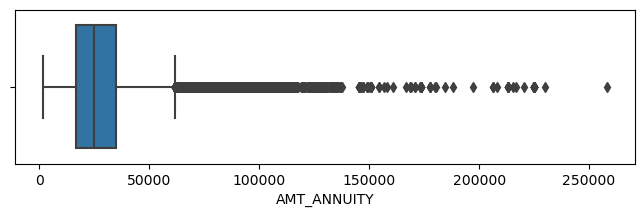

In [24]:
#handling null values in numerical columns of application data

#checking for outliers in "AMT_ANNUITY" variable in order to determine the replacement for null values in the column
plt.figure(figsize = [8,2])
sns.boxplot(x = appl_data["AMT_ANNUITY"])              #using seaborn to plot a boxplot for "AMT_ANNUITY" variable
plt.show()

In [25]:
#replacing "AMT_ANNUITY" with median values as presence of outliers could be seen

#median is preferred as replacing mean could take outliers into the account
appl_data["AMT_ANNUITY"].fillna(appl_data["AMT_ANNUITY"].median(), inplace = True)

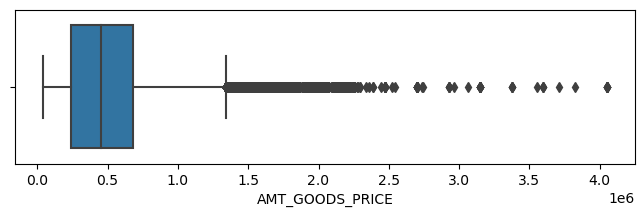

In [26]:
#handling null values in "AMT_GOODS_PRICE" variable

#checking for the presence of outliers in "AMT_GOOD_PRICE" column using a boxplot
plt.figure(figsize = [8,2])
sns.boxplot(x = appl_data["AMT_GOODS_PRICE"])
plt.show()

In [27]:
#replacing null values in "AMT_GOODS_PRICE" column with median value
appl_data["AMT_GOODS_PRICE"].fillna( appl_data["AMT_GOODS_PRICE"].median() , inplace = True)

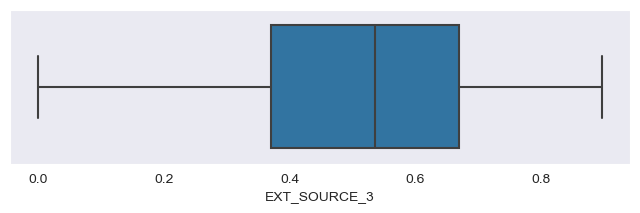

In [28]:
#handling null values in "EXT_SOURCE_3" column

#checking for the presence of outliers
sns.set_style("dark")
plt.figure(figsize = [8,2])
sns.boxplot(x = appl_data["EXT_SOURCE_3"])
plt.show()

In [29]:
#replacing null values in "EXIT_SOURCE_3" with mean value of variable
appl_data["EXT_SOURCE_3"].fillna( appl_data["EXT_SOURCE_3"].mean() , inplace = True)

In [30]:
#reading the AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR columns

appl_data.iloc[:,-6:].head()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
#handling null values in AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR columns

#replacing null values in the above columns with 0
appl_data.iloc[:, -6:] = appl_data.iloc[:, -6:].fillna(0)

In [32]:
#re-examination of the null values in application data dataframe in percentage

round(appl_data.isna().sum()*100 / len(appl_data), 2)

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.00
NAME_TYPE_SUITE                0.00
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
FLAG_MOBIL                     0.00
FLAG_EMP_PHONE                 0.00
FLAG_WORK_PHONE                0.00
FLAG_CONT_MOBILE               0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                     0.00
CNT_FAM_MEMBERS             

In [33]:
#handling null values in categorical column "PRODUCT_COMBINATION" in previous application dataframe

#replacing the null values in categorical column with mode "Cash"
prev_appl["PRODUCT_COMBINATION"].fillna( prev_appl["PRODUCT_COMBINATION"].mode()[0] , inplace = True)

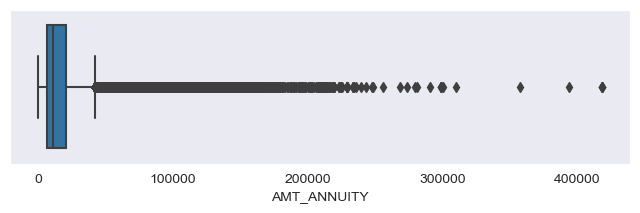

In [34]:
#handling the null values in the numerical column of "previous application" dataframe

#checking for the outliers in the "AMT_ANNUITY" variable through a box plot
plt.figure(figsize = [8,2])
sns.boxplot(x = prev_appl["AMT_ANNUITY"])
plt.show()

In [35]:
#replacing the null values in "AMT_ANNUITY" column with median of the variable "11250.0"
prev_appl["AMT_ANNUITY"].fillna( prev_appl["AMT_ANNUITY"].median() , inplace = True)

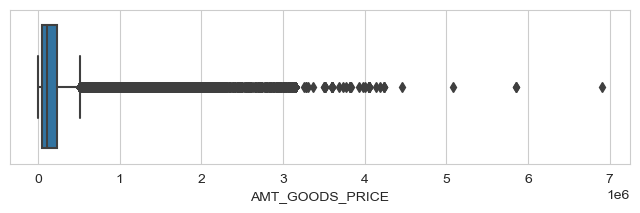

In [36]:
#handling null values in "AMT_GOODS_PRICE" column of previous application dataframe

#checking for outliers in the "AMT_GOODS_PRICE" variable through a boxplot
sns.set_style("whitegrid")
plt.figure(figsize = [8,2])
sns.boxplot(x = prev_appl["AMT_GOODS_PRICE"])
plt.show()

In [37]:
#replacing null values in "AMT_GOODS_PRICE" with median value of the variable
prev_appl["AMT_GOODS_PRICE"].fillna( prev_appl['AMT_GOODS_PRICE'].median() , inplace = True)

In [38]:
#handling null values in "CNT_PAYMENT" in previous dataframe variable

#checking the statistical summary of the "CNT_PAYMENT" variable
prev_appl["CNT_PAYMENT"].describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

In [39]:
#replacing the null values in the "CNT_PAYMENT" with median value of the variable
prev_appl["CNT_PAYMENT"].fillna( prev_appl["CNT_PAYMENT"].median() , inplace = True)

In [55]:
#dropping the record with null value in AMT_CREDIT column in prev_appl dataframe

prev_appl = prev_appl[ ~ (prev_appl["AMT_CREDIT"].isna())  ]

In [40]:
#re-examination of the null values in the previous application dataframe

round((prev_appl.isna().sum()*100)/len(prev_appl) , 1)

SK_ID_PREV                     0.0
SK_ID_CURR                     0.0
NAME_CONTRACT_TYPE             0.0
AMT_ANNUITY                    0.0
AMT_APPLICATION                0.0
AMT_CREDIT                     0.0
AMT_GOODS_PRICE                0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
NFLAG_LAST_APPL_IN_DAY         0.0
NAME_CASH_LOAN_PURPOSE         0.0
NAME_CONTRACT_STATUS           0.0
DAYS_DECISION                  0.0
NAME_PAYMENT_TYPE              0.0
CODE_REJECT_REASON             0.0
NAME_CLIENT_TYPE               0.0
NAME_GOODS_CATEGORY            0.0
NAME_PORTFOLIO                 0.0
NAME_PRODUCT_TYPE              0.0
CHANNEL_TYPE                   0.0
SELLERPLACE_AREA               0.0
NAME_SELLER_INDUSTRY           0.0
CNT_PAYMENT                    0.0
NAME_YIELD_GROUP               0.0
PRODUCT_COMBINATION            0.0
dtype: float64

### Handling Outliers 

<function matplotlib.pyplot.show(close=None, block=None)>

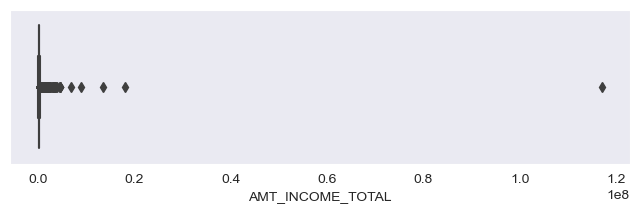

In [41]:
#checking for outliers in "AMT_INCOME_TOTAL" column in application data through a box plot

sns.set_style("dark")
plt.figure(figsize = [8,2])
sns.boxplot(x = appl_data["AMT_INCOME_TOTAL"])
plt.show                #presence of outliers could be deducted and the entire box region has crunched view

In [42]:
#statistical description of the column "AMT_INCOME_TOTAL"

appl_data["AMT_INCOME_TOTAL"].describe()     #max value stands at 117000000.0 and median at 147150.0

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [43]:
#checking the 99th percentile of the "AMT_INCOME_TOTAL" column

appl_data["AMT_INCOME_TOTAL"].quantile([0.5,0.95,0.98,0.99,1])  #significant difference between 98th percentile and maximum value could be witnessed

0.50       147150.0
0.95       337500.0
0.98       427500.0
0.99       472500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [44]:
#dropping the records beyond 98th percentile of the "AMT_INCOME_TOTAL" variable in application data dataframe

appl_data = appl_data[ ~ (appl_data["AMT_INCOME_TOTAL"] >= appl_data["AMT_INCOME_TOTAL"].quantile(0.98)) ]

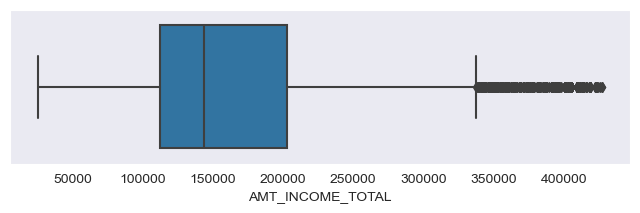

In [45]:
#plotting a box plot for "AMT_INCOME_TOTAL" variable to check the distribution

sns.set_style("dark")
plt.figure(figsize = [8,2])
sns.boxplot(x = appl_data["AMT_INCOME_TOTAL"])
plt.show()                                 #values beyond the high extreme seems to be continuous and could not be neglected

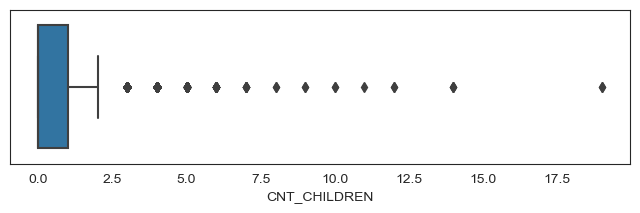

In [46]:
#handling outliers in column "CNT_CHILDREN"

sns.set_style("white")
plt.figure(figsize = [8,2])
sns.boxplot(x = appl_data["CNT_CHILDREN"])
plt.show()

#clearly, outliers in the "CNT_CHILDREN" column could be seen and hence, need to be removed.

In [47]:
#dropping the records beyond count of children more than 6 numbers

appl_data = appl_data[ ~ (appl_data["CNT_CHILDREN"] > 6) ]

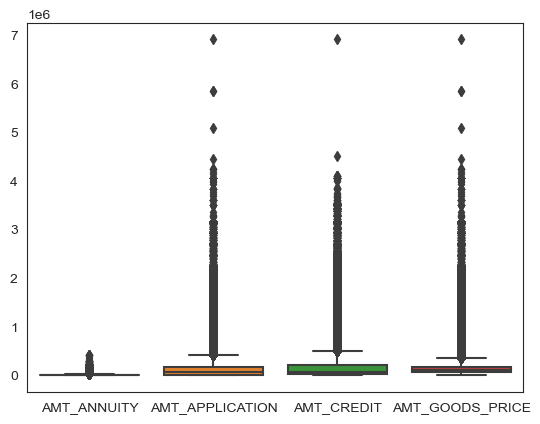

In [48]:
#handling outliers in "AMT_ANNUITY", "AMT_APPLICATION", "AMT_CREDIT", "AMT_DOWN_PAYMENT", "AMT_GOODS_PRICE" variables in prev_appl data frame

#plotting a box plot for deduction of outliers
sns.boxplot(prev_appl[["AMT_ANNUITY", "AMT_APPLICATION", "AMT_CREDIT", "AMT_GOODS_PRICE"]])
plt.show()

#continuous values could be seen beyond high extreme and could not be neglected.

### Fixing the columns
#### Handling the datatypes of the columns

In [49]:
#printing the head of the dataframe to verify and determine the correct datatypes for the columns

pd.set_option("display.max_columns", None)          #to display all the columns instead of the truncated view
appl_data.head(7)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.510853,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.510853,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,-1213.0,-619,1,1,0,1,1,0,3.0,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.724000,0.492060,1.0,0.0,1.0,0.0,-1562.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0


In [50]:
#Replacing the dataypes of the following columns with "int" as the datatypes are incorrectly set to "float"

#using dictionary to convert specific columns
convert_col = {"DAYS_REGISTRATION":int,"CNT_FAM_MEMBERS":int,"OBS_30_CNT_SOCIAL_CIRCLE":int,
               "DEF_30_CNT_SOCIAL_CIRCLE":int,"OBS_60_CNT_SOCIAL_CIRCLE":int,"DEF_60_CNT_SOCIAL_CIRCLE":int,
               "AMT_REQ_CREDIT_BUREAU_HOUR":int,"AMT_REQ_CREDIT_BUREAU_DAY":int,"AMT_REQ_CREDIT_BUREAU_WEEK":int,
               "AMT_REQ_CREDIT_BUREAU_MON":int,"AMT_REQ_CREDIT_BUREAU_QRT":int,"AMT_REQ_CREDIT_BUREAU_YEAR":int}

appl_data = appl_data.astype(convert_col , errors = "ignore")

In [51]:
#converting the datatype of the columns 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE' into integer

col_dtypes = {'AMT_INCOME_TOTAL':int, 'AMT_CREDIT':int, 'AMT_ANNUITY':int, 'AMT_GOODS_PRICE':int}

appl_data = appl_data.astype( col_dtypes )

In [56]:
#converting the datatype of the columns 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE' into integer

dtype_cols = {"AMT_ANNUITY" : int, "AMT_APPLICATION": int, "AMT_CREDIT": int, "AMT_GOODS_PRICE": int}

prev_appl = prev_appl.astype(dtype_cols)

#### Dropping unnecessary columns

In [57]:
#dropping the unnecessary columns from the dataframe: 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4','FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13','FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16','FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19','FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'

appl_data = appl_data.drop( appl_data.iloc[:,46:66].columns , axis = 1 )

#### Creating new columns

In [58]:
#creating a new column for age in years instead of the age in days present in dataframe

appl_data["AGE_IN_YEARS"]  =  appl_data["DAYS_BIRTH"].apply(lambda x  : int(abs(x) / 365))

In [59]:
#dropping the "DAYS_BIRTH" column as new column for age has been created

appl_data = appl_data.drop(["DAYS_BIRTH"] , axis = 1)
appl_data.head()       #ensuring the changes in column: addition of "AGE_IN_YEARS" & deletion of "DAYS_BIRTH"

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_IN_YEARS
0,100002,1,Cash loans,M,N,Y,0,202500,406597,24700,351000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-637,-3648,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,0,0,0,0,1,25
1,100003,0,Cash loans,F,N,N,0,270000,1293502,35698,1129500,Family,State servant,Higher education,Married,House / apartment,0.003541,-1188,-1186,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,1.0,0.0,1.0,0.0,-828.0,0,0,0,0,0,0,45
2,100004,0,Revolving loans,M,Y,Y,0,67500,135000,6750,135000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-225,-4260,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,52
3,100006,0,Cash loans,F,N,Y,0,135000,312682,29686,297000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-3039,-9833,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.510853,2.0,0.0,2.0,0.0,-617.0,0,0,0,0,0,0,52
4,100007,0,Cash loans,M,N,Y,0,121500,513000,21865,513000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-3038,-4311,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.510853,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,54


### Checking consistency of the records

In [60]:
#handling inconsistent values in 'CODE_GENDER' variable

appl_data["CODE_GENDER"].value_counts()   #could confirm that 4 records of "CODE_GENDER" column has "XNA" records which are invalid

F      199647
M      101590
XNA         4
Name: CODE_GENDER, dtype: int64

In [61]:
#replacing "XNA" with "F" in "CODE_GENDER" column as "F" is mode of variable and won't affect the analysis

appl_data["CODE_GENDER"] = appl_data["CODE_GENDER"].apply(lambda x : x.replace("XNA","F"))

In [62]:
#handling values in "NAME_FAMILY_STATUS" column

appl_data["NAME_FAMILY_STATUS"].value_counts()    #1 record has a value "Unknown"

Married                 192083
Single / not married     44593
Civil marriage           29264
Separated                19348
Widow                    15952
Unknown                      1
Name: NAME_FAMILY_STATUS, dtype: int64

In [63]:
#replacing the "Unknown" value with "Married" value in "NAME_FAMILY_STATUS" column
#renaming the value "Single / not married" with "Single/Unmarried"

appl_data["NAME_FAMILY_STATUS"] = appl_data["NAME_FAMILY_STATUS"].apply(lambda x : x.replace("Unknown","Married"))
appl_data["NAME_FAMILY_STATUS"] = appl_data["NAME_FAMILY_STATUS"].apply(lambda x : x.replace("Single / not married","Single/Unmarried"))

In [64]:
#handling inconsistent values in "ORGANIZATION_TYPE" column of application data dataframe

appl_data["ORGANIZATION_TYPE"].value_counts()   #54928 records has value "XNA" which are invalid. Replacing the "XNA" with mode of the variable would skew the analysis with bias towards "Business Entity Type 3". Dropping the records with "XNA" would significantly reduce the data as it accounts for 19% of total values 

Business Entity Type 3    65809
XNA                       54928
Self-employed             37741
Other                     16320
Medicine                  11041
Business Entity Type 2    10361
Government                10256
School                     8792
Trade: type 7              7661
Kindergarten               6847
Construction               6524
Business Entity Type 1     5789
Transport: type 4          5257
Trade: type 3              3439
Industry: type 3           3253
Industry: type 9           3243
Security                   3196
Housing                    2916
Industry: type 11          2681
Military                   2494
Agriculture                2431
Bank                       2384
Police                     2281
Transport: type 2          2179
Postal                     2144
Security Ministries        1892
Trade: type 2              1834
Restaurant                 1775
Services                   1536
Industry: type 7           1294
University                 1285
Transpor

In [65]:
#replacing the "XNA" value with np.NaN as "ORGANIZATION_TYPE" column woould be useful for further analysis

appl_data.loc[ appl_data["ORGANIZATION_TYPE"] == "XNA" , "ORGANIZATION_TYPE"  ] = np.NaN
appl_data["ORGANIZATION_TYPE"].value_counts()    #rechecking the value counts of the "ORGANIZATION_TYPE" column

Business Entity Type 3    65809
Self-employed             37741
Other                     16320
Medicine                  11041
Business Entity Type 2    10361
Government                10256
School                     8792
Trade: type 7              7661
Kindergarten               6847
Construction               6524
Business Entity Type 1     5789
Transport: type 4          5257
Trade: type 3              3439
Industry: type 3           3253
Industry: type 9           3243
Security                   3196
Housing                    2916
Industry: type 11          2681
Military                   2494
Agriculture                2431
Bank                       2384
Police                     2281
Transport: type 2          2179
Postal                     2144
Security Ministries        1892
Trade: type 2              1834
Restaurant                 1775
Services                   1536
Industry: type 7           1294
University                 1285
Transport: type 3          1173
Industry

### Checking for Imbalance in the data

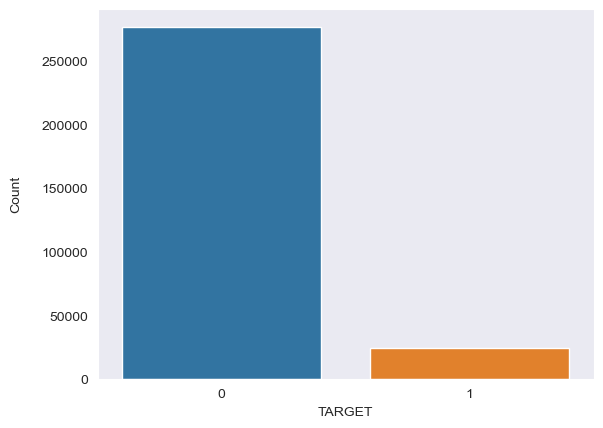

In [66]:
#Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations

sns.set_style("dark")
sns.countplot(x = appl_data["TARGET"])
plt.ylabel("Count\n")
plt.show()

#certainly, imbalance in the data could be witnessed from the plot. 0 (Non-Defaulters) is the majority class and 1 (Defaulters) is the minority class

#### Imbalance Ratio (IR)
##### Imbalance Ratio (IR), defined as the ratio of the number of instances in the majority class to the number of instances in the minority class.

In [67]:
#calculation of imbalance ratio in the data
target_0_count = appl_data["TARGET"].value_counts()[0]
target_1_count = appl_data["TARGET"].value_counts()[1]

IR = target_0_count / target_1_count        #imbalance ratio (IR), defined as the ratio of the number of instances in the majority class to the number of instances in the minority class
print(round(IR,3)) 

11.311


##### Imbalance Ratio for dataset is 11.31

### Univariate Analysis

In [68]:
#calculating the percentage of the values in NAME_CONTRACT_TYPE variable

appl_data["NAME_CONTRACT_TYPE"].value_counts(normalize = True)*100

Cash loans         90.615819
Revolving loans     9.384181
Name: NAME_CONTRACT_TYPE, dtype: float64

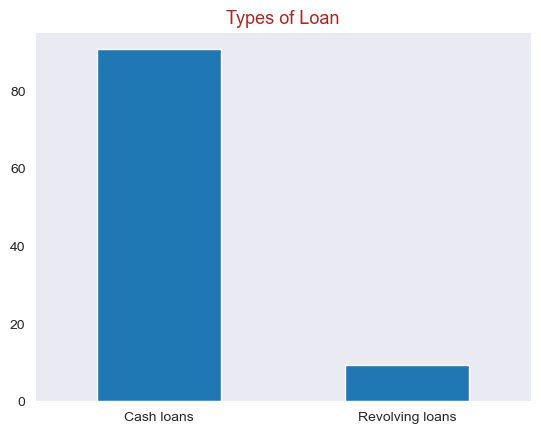

In [69]:
#plotting a bar graph of percentage for NAME_CONTRACT_TYPE
(appl_data["NAME_CONTRACT_TYPE"].value_counts(normalize = True)*100).plot.bar()
plt.title("Types of Loan", fontdict = {"fontsize":13,"fontweight":5,"color":"Brown"})
plt.xticks(rotation = 360)
plt.show()

#90% of loans are cash loans and 10% accounts for revolving/credit card loans

In [70]:
#calculation of percentages of values in "FLAG_OWN_CAR" column

appl_data["FLAG_OWN_CAR"].value_counts(normalize = True)*100

N    66.555349
Y    33.444651
Name: FLAG_OWN_CAR, dtype: float64

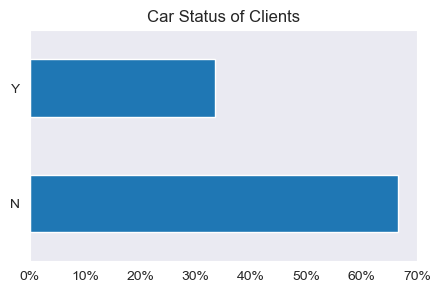

In [71]:
#visualising the percentages in bar graph for "FLAG_OWN_CAR" variable

plt.figure(figsize = [5,3])
(appl_data["FLAG_OWN_CAR"].value_counts(normalize = True)*100).plot.barh()
plt.title("Car Status of Clients")
ticks = np.arange(0,80,10)
labels = [ "{}%".format(i) for i in ticks]
plt.xticks(ticks,labels)
plt.show()

#1/3rd of the clients own a car and 2/3rd does not own a car, could be inferred from the bar graph

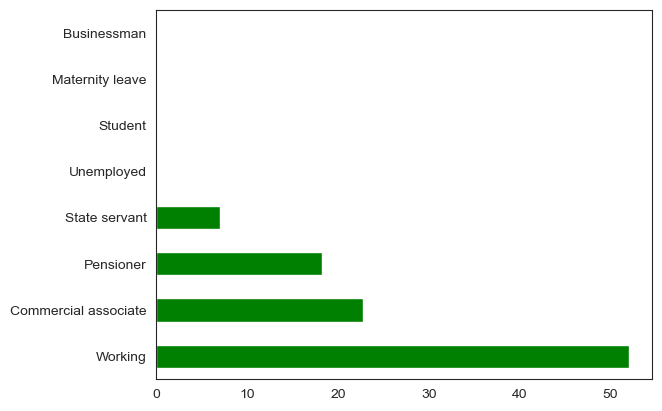

In [72]:
#plotting a bar graph in percentages for the "NAME_INCOME_TYPE" column of application data dataframe

sns.set_style("white")
(appl_data["NAME_INCOME_TYPE"].value_counts(normalize = True)*100).plot.barh(color = "Green")
plt.show()

#>50% of the clients are working population and sources of income of clients could be seen from the graph below

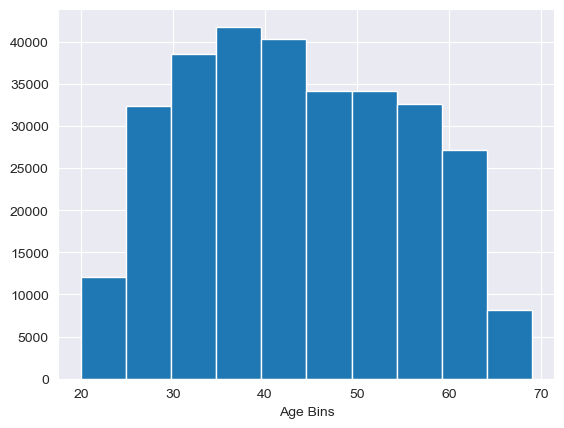

In [73]:
#checking the distribution of the "AGE_IN_YEARS" variable through an histogram

sns.set_style("darkgrid")
plt.hist(x = appl_data["AGE_IN_YEARS"])
plt.xlabel("Age Bins")
plt.show()

#more instances lies between 35 years to 45 years of age. Hence, clients of age 35 to 45 has applied for loan in high numbers

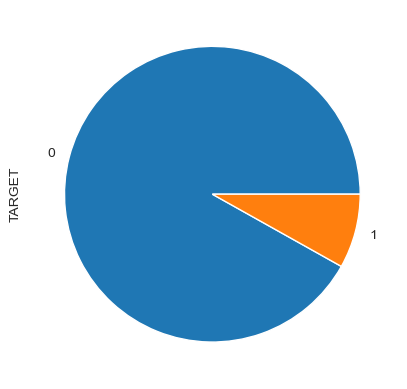

In [74]:
#visualising the percentages of values in "TARGET" variable in a pie chart

(appl_data["TARGET"].value_counts(normalize  =  True)*100).plot.pie()
plt.show()

#As discussed earlier, 92% of clients does not have any default history. 8% are defaulters, could be inferred from pie chart

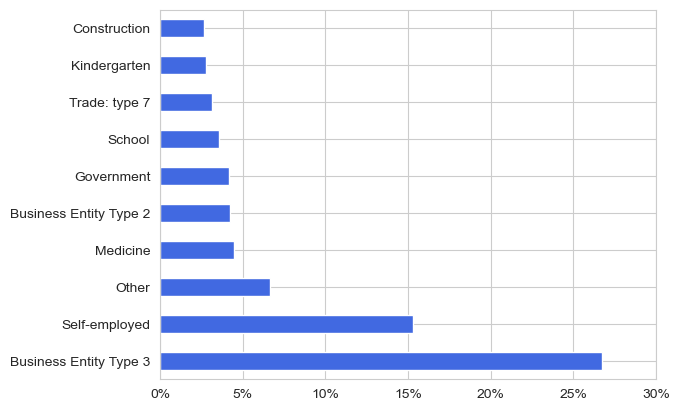

In [75]:
#plotting a bar chart for top organizational types of the clients 

sns.set_style("whitegrid")
(appl_data["ORGANIZATION_TYPE"].value_counts(normalize  =  True)*100).head(10).plot.barh(color = "royalblue")
ticks = np.arange(0,35,5)
labels = ["{}%".format(i) for i in ticks]
plt.xticks(ticks,labels)
plt.show()

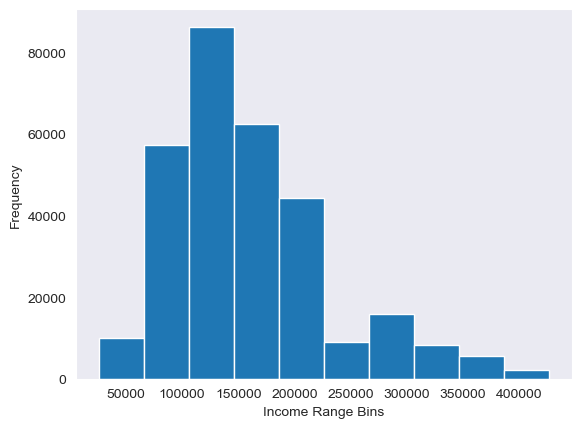

In [76]:
#checking the distribution of the "AMT_INCOME_TOTAL" values through an histogram

sns.set_style("dark")
appl_data["AMT_INCOME_TOTAL"].plot.hist()
plt.xlabel("Income Range Bins")
plt.show()

#hugh occurrence could be seen between 1L to 1.5L; the income range of the majority clients are spread within 75K to 2.25L

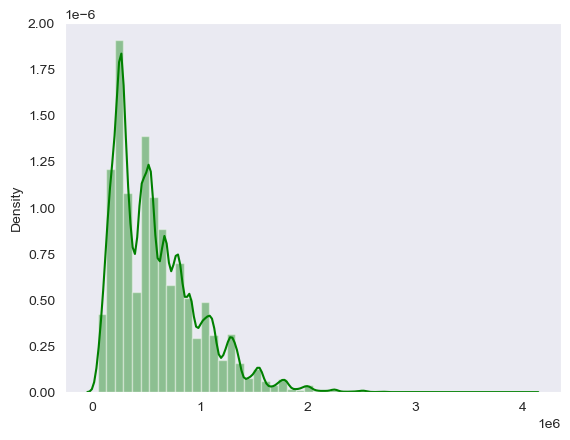

In [77]:
#plotting a distplot for "AMT_CREDIT" column for check the density of the "AMT_CREDIT" values

sns.distplot(x = appl_data["AMT_CREDIT"], color ="green")
plt.show()

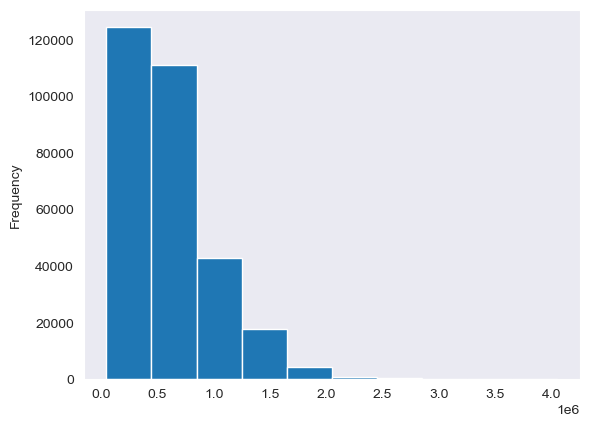

In [78]:
#visualising the frequency of the "AMT_CREDIT" buckets through an histogram

appl_data["AMT_CREDIT"].plot.hist()
plt.show()

#majority of the loan credit amount lies within 15L and high occurrence of credits could be seen within 1L and 10L

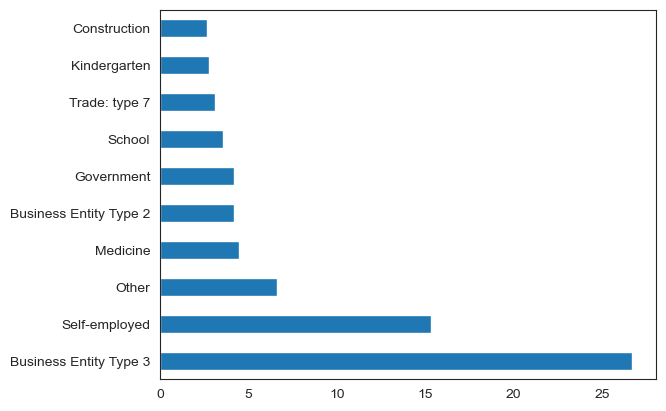

In [79]:
#plotting the bar graph for top 10 occuring organization type (ORGANIZATION_TYPE) in percentages

sns.set_style("white")
(appl_data["ORGANIZATION_TYPE"].value_counts(normalize = True) * 100).head(10).plot.barh()
plt.show()

#Business Entity Type 3 accounts for highest percentage of 26.7

In [80]:
#grouping by the education(NAME_EDUCATION_TYPE) to find the mean of the AMT_INCOME_TOTAL for each education category.

appl_data.groupby(by = ["NAME_EDUCATION_TYPE"])["AMT_INCOME_TOTAL"].mean()

NAME_EDUCATION_TYPE
Academic degree                  205550.335570
Higher education                 187999.734460
Incomplete higher                171831.150344
Lower secondary                  127534.333509
Secondary / secondary special    150715.076310
Name: AMT_INCOME_TOTAL, dtype: float64

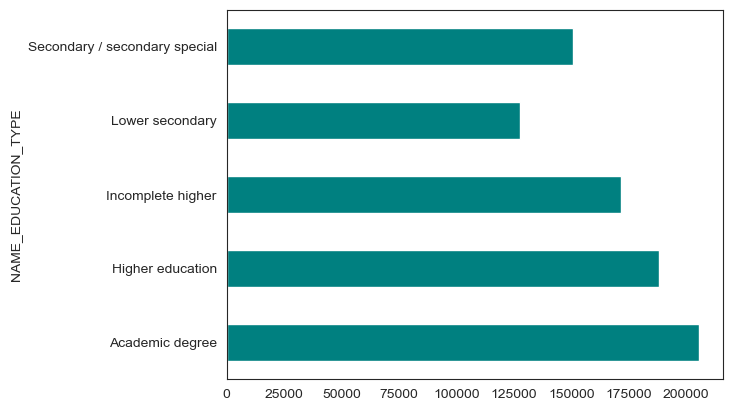

In [81]:
appl_data.groupby(by = ["NAME_EDUCATION_TYPE"])["AMT_INCOME_TOTAL"].mean().plot.barh(color = "teal")
plt.show()

#average income of academic degree holding clients is highest among the others: 2,05,550

## Bivariate and Multivariate Analysis

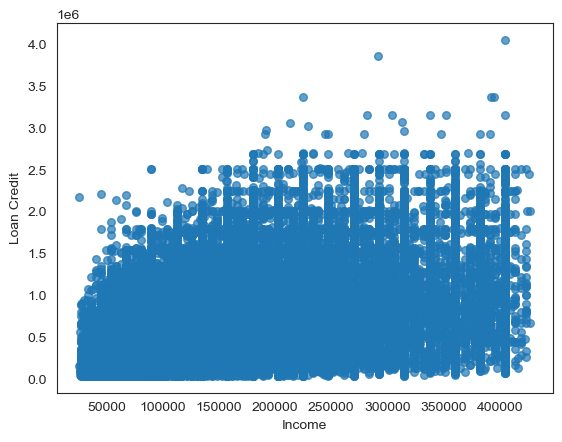

In [82]:
#plotting a scatter plot to visualise the underlying pattern between "AMT_INCOME_TOTAL" and "AMT_CREDIT"

plt.scatter(appl_data["AMT_INCOME_TOTAL"], appl_data["AMT_CREDIT"], alpha = 0.7, s = 30)
plt.xlabel("Income")
plt.ylabel("Loan Credit")
plt.show()

#Clients of high income group (>200000) has loan credit amount greater than 27L
#No strong relation or pattern could be seen between income and loan credit amount

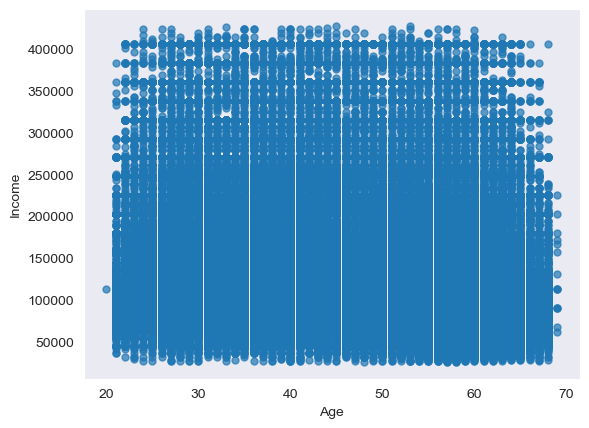

In [83]:
#scatter plot for "AGE_IN_YEARS" and "AMT_INCOME_TOTAL" in appl_data

sns.set_style("dark")
plt.scatter(appl_data["AGE_IN_YEARS"] , appl_data["AMT_INCOME_TOTAL"], alpha = 0.7, s = 25)
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

#no pattern could be identified between age and income. Data points of age and income has been spread uniformly throughout the plot

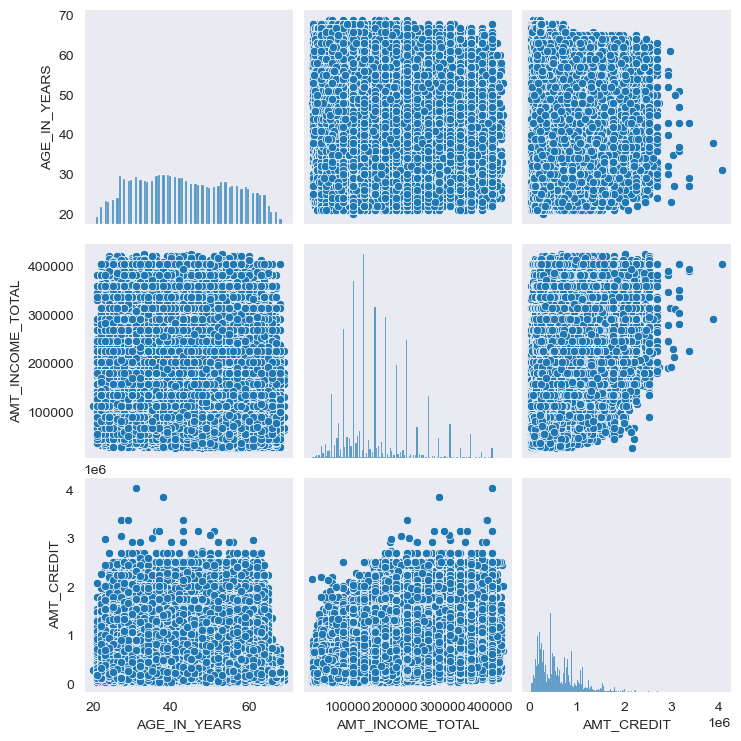

In [84]:
#plotting a pair plot for age, income and loan credit in appl_data

sns.pairplot(appl_data[["AGE_IN_YEARS", "AMT_INCOME_TOTAL", "AMT_CREDIT"]])
plt.show()

In [85]:
#creating a correlation matrix for age, income and loan credit in appl_data

appl_data[["AGE_IN_YEARS", "AMT_INCOME_TOTAL", "AMT_CREDIT"]].corr()

,AGE_IN_YEARS,AMT_INCOME_TOTAL,AMT_CREDIT
AGE_IN_YEARS,1.000000,-0.078346,0.056749
AMT_INCOME_TOTAL,-0.078346,1.000000,0.390411
AMT_CREDIT,0.056749,0.390411,1.000000


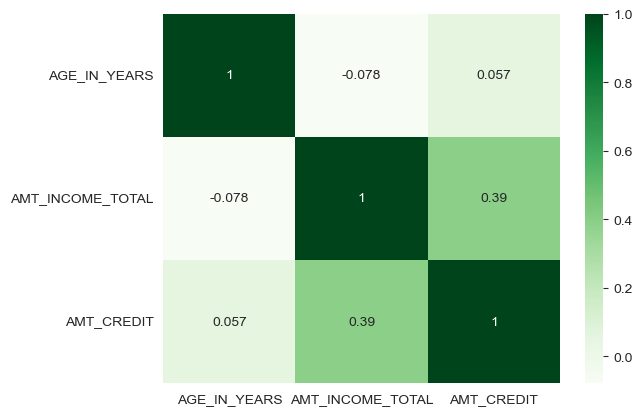

In [86]:
#plotting a correlation heatmap for age, income and loan credit in appl_data

sns.heatmap(appl_data[["AGE_IN_YEARS", "AMT_INCOME_TOTAL", "AMT_CREDIT"]].corr(), annot = True, cmap = "Greens")
plt.show()

#positive correlation of 0.39 could be seen between total income and credit amount

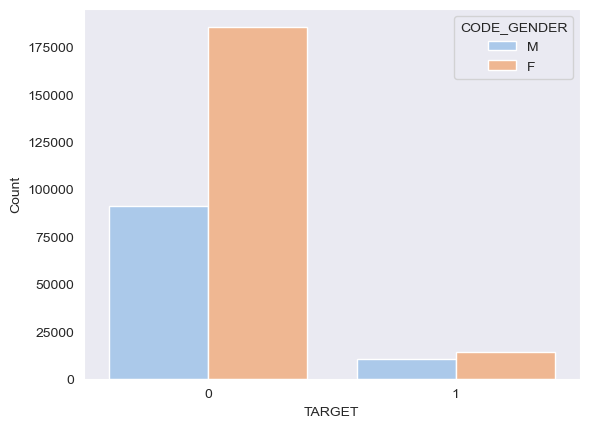

In [87]:
#visualising the gender based distribution of the defaulters and non-defaulters

sns.countplot(data = appl_data, x="TARGET", hue='CODE_GENDER', palette = "pastel")
plt.ylabel("Count")
plt.show()

#In gender based classification of target, female clients accounts for huge numbers in non-defaulters

In [88]:
#Binning the "AGE_IN_YEARS" and "AMT_INCOME_TOTAL" for better analysis

#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from "AGE_IN_YEARS" column
appl_data["AGE_GROUP"] = pd.cut(appl_data["AGE_IN_YEARS"], [0,30,40,50,60,300], labels = ["<30", "30-40", "40-50", "50-60", "60+"])
appl_data.iloc[:,-2:].head()   

,AGE_IN_YEARS,AGE_GROUP
0,25,<30
1,45,40-50
2,52,50-60
3,52,50-60
4,54,50-60


In [89]:
#create the buckets of "25K-75K","75K-1.25L","1.25L-1.75L","1.75L-2.25L","2.25L-2.75L","2.75L-3.25L","3.25L-3.75L",">3.75L" from "AMT_INCOME_TOTAL" column

appl_data["INCOME_GROUP"] = pd.cut(appl_data["AMT_INCOME_TOTAL"], [25000,75000,125000,175000,225000,275000,325000,375000,4250000], labels = ["25K-75K","75K-1.25L","1.25L-1.75L","1.75L-2.25L","2.25L-2.75L","2.75L-3.25L","3.25L-3.75L",">3.75L"])
appl_data[["AMT_INCOME_TOTAL","INCOME_GROUP"]].head()

,AMT_INCOME_TOTAL,INCOME_GROUP
0,202500,1.75L-2.25L
1,270000,2.25L-2.75L
2,67500,25K-75K
3,135000,1.25L-1.75L
4,121500,75K-1.25L


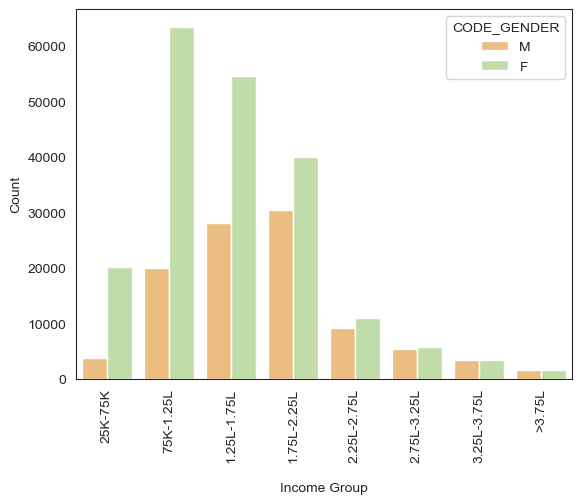

In [90]:
#gender based distrbution of the income range through a countplot

sns.set_style("white")
sns.countplot(data = appl_data, x = "INCOME_GROUP", hue = "CODE_GENDER", palette = "Spectral")
plt.ylabel("Count")
plt.xlabel("\nIncome Group")
plt.xticks(rotation = 90)
plt.show()

In [91]:
#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from "AMT_CREDIT" column

bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,1500000,2500000,5000000]

bin_labels = ["<1L","1L-2L","2L-3L","3L-4L","4L-5L","5L-6L","6L-7L","7L-8L","8L-9L","9L-10L","10L-15L","15L-25L",">25L"]

appl_data["CREDIT_RANGE"] = pd.cut(appl_data["AMT_CREDIT"], bins, labels = bin_labels)
appl_data[["AMT_CREDIT","CREDIT_RANGE"]].head()

,AMT_CREDIT,CREDIT_RANGE
0,406597,4L-5L
1,1293502,10L-15L
2,135000,1L-2L
3,312682,3L-4L
4,513000,5L-6L


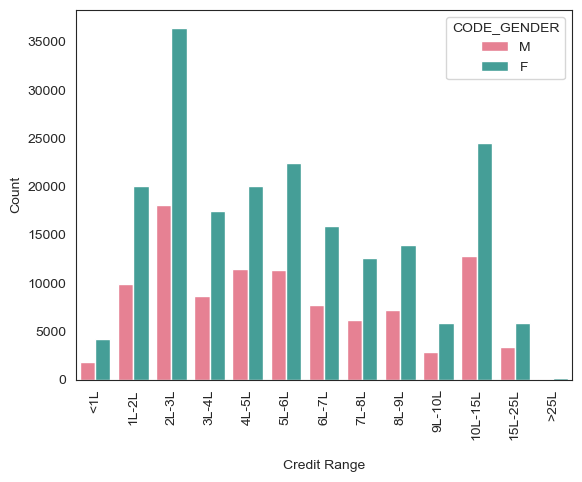

In [92]:
#gender based distribution of the credit amount "CREDIT_RANGE" through a countplot

sns.countplot(data = appl_data, x = "CREDIT_RANGE", hue = "CODE_GENDER", palette = "husl")
plt.xticks(rotation = 90)
plt.xlabel("\nCredit Range")
plt.ylabel("Count")
plt.show()

In [93]:
#creation of dataframes for target 0 and target 1, extracting from application data

targ_0 = appl_data[  appl_data["TARGET"] == 0 ]
targ_1 = appl_data[  appl_data["TARGET"] == 1 ]

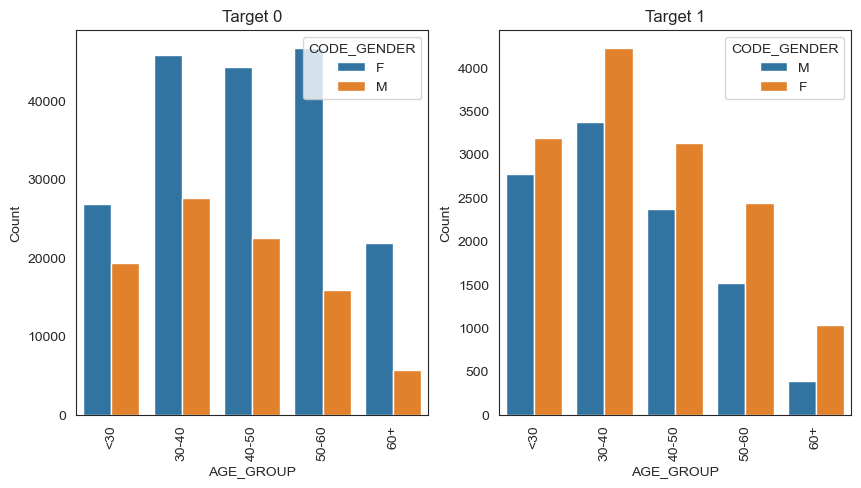

In [94]:
#gender based classification of age group in separate plots for defaulters and non-defaulters

plt.figure(figsize = [10,5])

plt.subplot(1,2,1)
sns.countplot(data = targ_0, x = "AGE_GROUP", hue = "CODE_GENDER")
plt.title("Target 0")
plt.xticks(rotation = 90)
plt.ylabel("Count")

plt.subplot(1,2,2)
sns.countplot(data = targ_1, x = "AGE_GROUP", hue = "CODE_GENDER")
plt.title("Target 1")
plt.xticks(rotation = 90)
plt.ylabel("Count")
plt.show()

##### In gender based classification on age group of clients,
> 1. Among defaulters, 30-40 age group has high occurrence; for non-defaulters, uniform spread across various age group could be seen.
>2. In defaulters, 60+ age group clients accounts a low percentage of 5.86% and 30-40 age group accounts 31.04%.

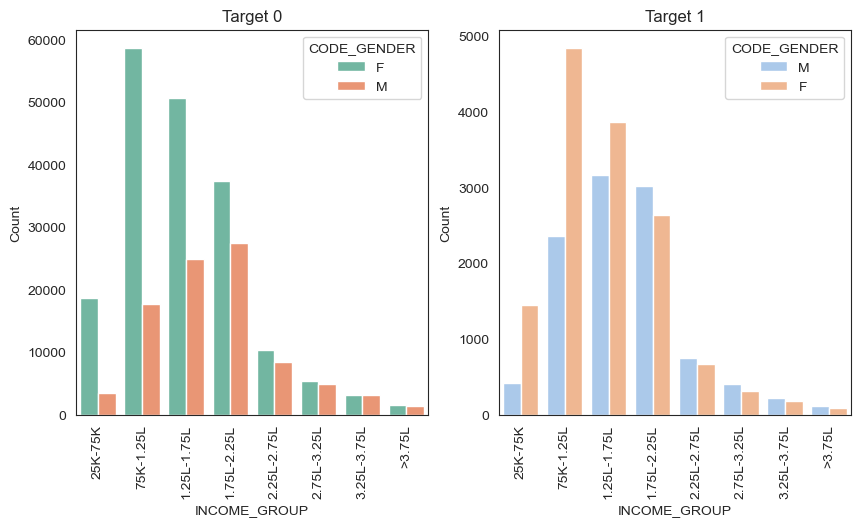

In [95]:
#visualising the distribution of income range for defaulters and non-defaulters, separately.

plt.figure(figsize = [10,5])

plt.subplot(1,2,1)
sns.countplot(data = targ_0, x = "INCOME_GROUP", hue = "CODE_GENDER", palette = "Set2")
plt.title("Target 0")
plt.xticks(rotation = 90)
plt.ylabel("Count")

plt.subplot(1,2,2)
sns.countplot(data = targ_1, x = "INCOME_GROUP", hue = "CODE_GENDER", palette = "pastel")
plt.title("Target 1")
plt.xticks(rotation = 90)
plt.ylabel("Count")
plt.show()

##### Insights from the graph
> 1. Both among the defaulters and non-defaulters, income range of 75,000 to 2,25,000 accounts for 80%(approx)
> 2. Very low occurrences could be seen beyond income range of more than 3,75,000
> 3. Among the income range of 1.75L to 2.25L in defaulters, male counts is higher in occurrence

In [96]:
targ_1["CODE_GENDER"].value_counts()

F    14038
M    10431
Name: CODE_GENDER, dtype: int64

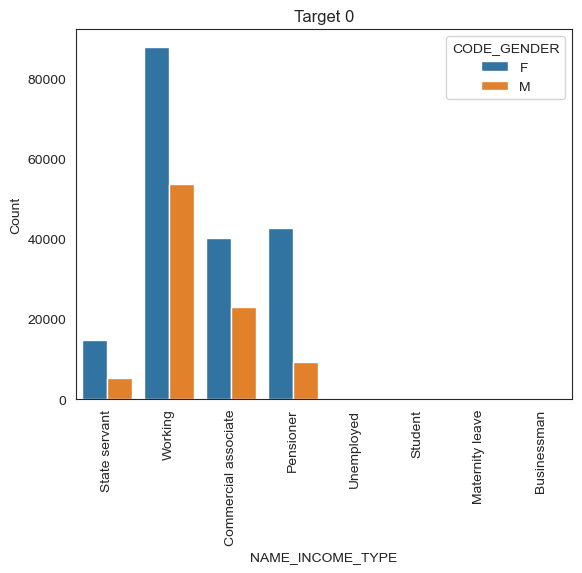

In [97]:
#visualising the distribution of income type for non-defaulters.

sns.countplot(data = targ_0, x = "NAME_INCOME_TYPE", hue = "CODE_GENDER")
plt.title("Target 0")
plt.xticks(rotation = 90)
plt.ylabel("Count")
plt.show()

#working among the source of income accounts for 51.15%, followed by commercial associate with 22.85%

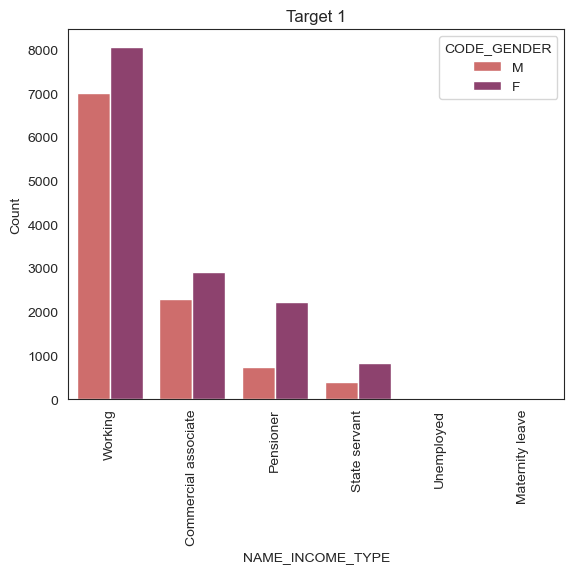

In [98]:
#visualising the distribution of income type for defaulters.

sns.countplot(data = targ_1, x = "NAME_INCOME_TYPE", hue = "CODE_GENDER", palette = "flare")
plt.title("Target 1")
plt.xticks(rotation = 90)
plt.ylabel("Count")
plt.show()

#Among the defaulters, working population accounts for 61.56% followed by commercial associate with 21.26%

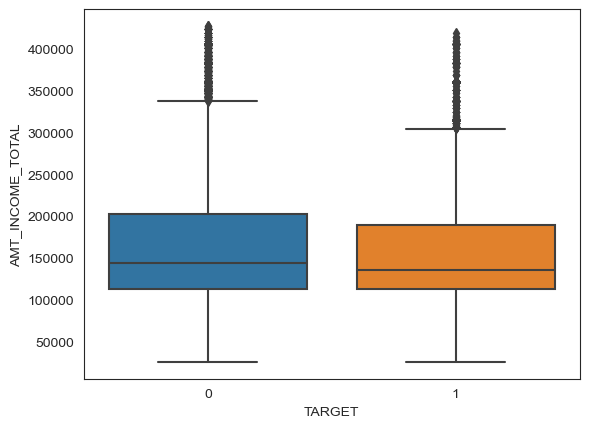

In [99]:
#plotting a box plot for income and target in appl_data

sns.boxplot(data = appl_data, x = "TARGET", y = "AMT_INCOME_TOTAL")
plt.show()

#median for the both defaulter and non-defaulters lies around 1,50,000. Similarly, 25% or Q1 lies at 1,25,000. 

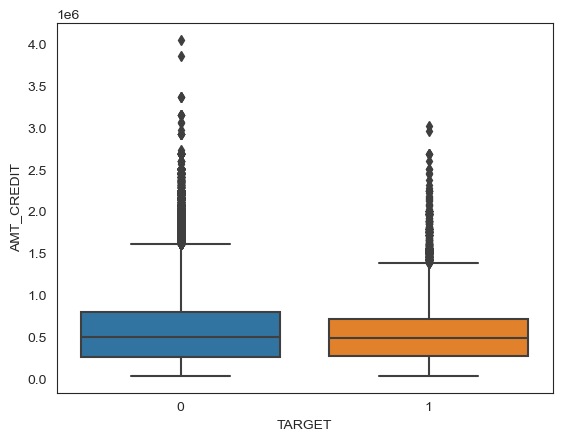

In [100]:
#plotting a box plot for credit amount and target in appl_data

sns.boxplot(data = appl_data, x = "TARGET", y = "AMT_CREDIT")
plt.show()

#median for both defaulters and non-defaulters lies at 5,00,000 and first quarter of box (25%) lies at 2,25,000.

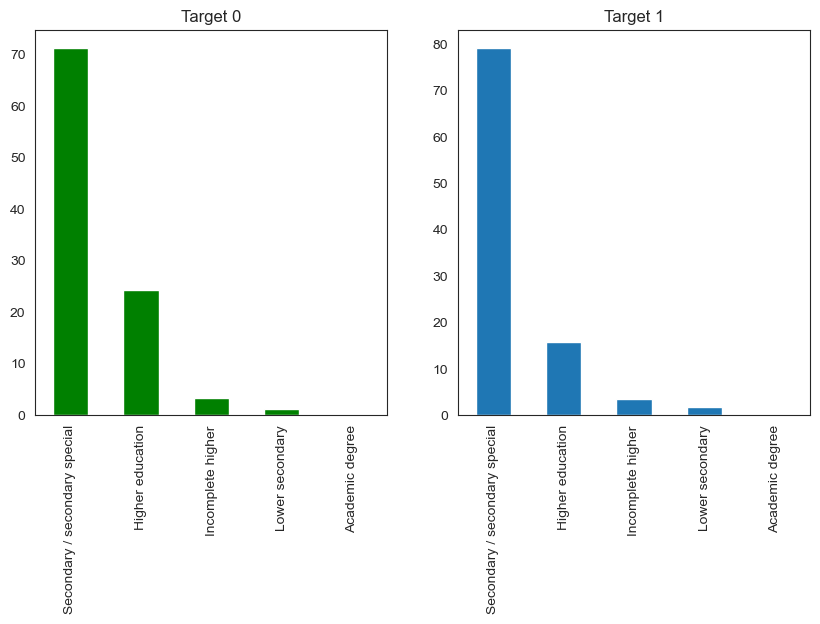

In [101]:
#plotting a bar graph for education (NAME_EDUCATION_TYPE) in percentages for defaulters and non-defaulters, seperately.
plt.figure(figsize = [10,5])

plt.subplot(1,2,1)
(targ_0["NAME_EDUCATION_TYPE"].value_counts(normalize = True)*100).plot.bar(color = "Green")
plt.title("Target 0")
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
(targ_1["NAME_EDUCATION_TYPE"].value_counts(normalize = True)*100).plot.bar()
plt.title("Target 1")
plt.xticks(rotation = 90)
plt.show()

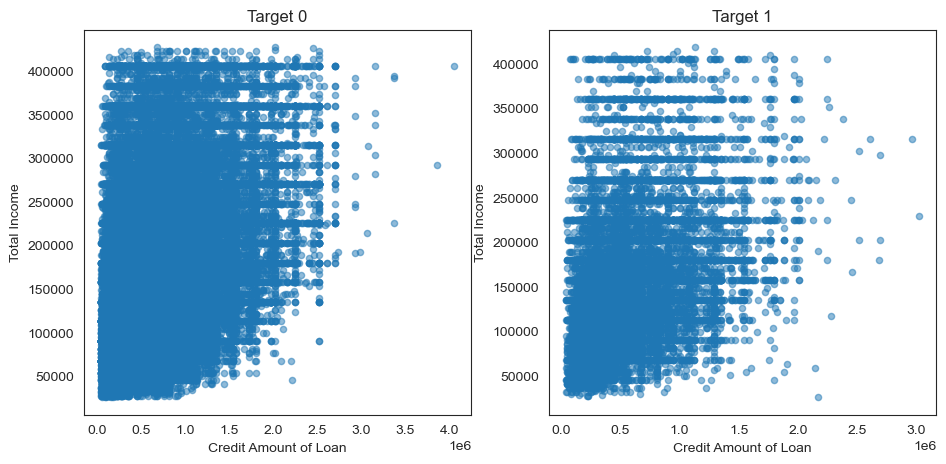

In [102]:
#plotting a scatter plot for AMT_INCOME_TOTAL and AMT_CREDIT columns for defaulters and non-defaulters in subplots

plt.figure(figsize = [11,5])

plt.subplot(1,2,1)
plt.scatter(data = targ_0, x = "AMT_CREDIT", y = "AMT_INCOME_TOTAL", s = 20, alpha = 0.5)
plt.xlabel("Credit Amount of Loan")
plt.ylabel("Total Income")
plt.title("Target 0")

plt.subplot(1,2,2)
plt.scatter(data = targ_1, x = "AMT_CREDIT", y = "AMT_INCOME_TOTAL", s = 20, alpha = 0.5)
plt.xlabel("Credit Amount of Loan")
plt.ylabel("Total Income")
plt.title("Target 1")
plt.show()

#credit amount of the loan beyond 20,00,000 has been applied by the clients beyond the total income of 2,00,000

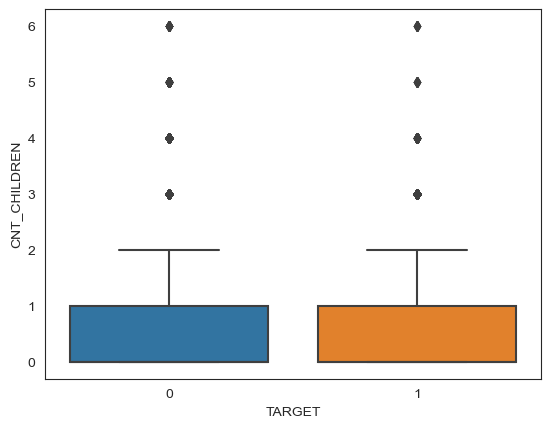

In [103]:
#plotting a box plot for CNT_CHILDREN and target in appl_data

sns.boxplot(data = appl_data, x = "TARGET", y = "CNT_CHILDREN")
plt.show()

## New column with replaced values in "TARGET" column

#### For better calculation of the mean, replacing the values in "TARGET" column could be done by creating a new column "DEFAULT_FLAG"
> 0 = Client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample.

> 1 = All other cases.

In [104]:
#creating a new column "DEFAULT_FLAG" with 0 = Client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample and 1 = All other cases.

appl_data["DEFAULT_FLAG"] = appl_data["TARGET"].apply(lambda x : 1 if x == 0 else 0)
appl_data[["TARGET","DEFAULT_FLAG"]].head()

,TARGET,DEFAULT_FLAG
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [105]:
#calculating the mean of DEFAULT_FLAG with different NAME_FAMILY_STATUS categories.

appl_data.groupby(by = ["NAME_FAMILY_STATUS"])["DEFAULT_FLAG"].mean()

#Clients with widowed family status has highest average of non-default of loan.

NAME_FAMILY_STATUS
Civil marriage      0.899877
Married             0.923919
Separated           0.917976
Single/Unmarried    0.901240
Widow               0.941449
Name: DEFAULT_FLAG, dtype: float64

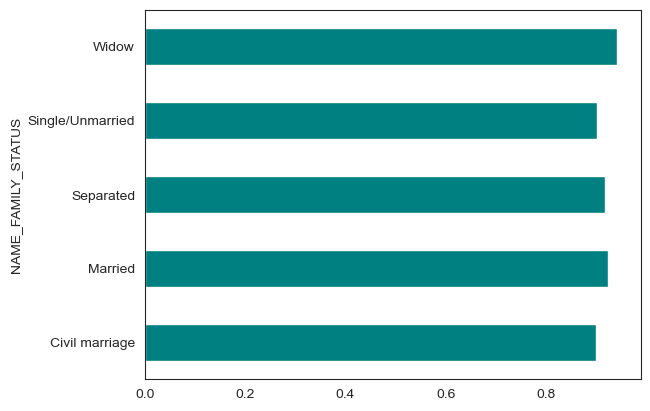

In [106]:
#plotting a bar graph for mean of DEFAULT_FLAG with different NAME_FAMILY_STATUS categories.

appl_data.groupby(by = ["NAME_FAMILY_STATUS"])["DEFAULT_FLAG"].mean().plot.barh(color = "teal")
plt.show()

In [107]:
#calculate the mean of DEFAULT_FLAG with different education categories.

appl_data.groupby(by = ["NAME_EDUCATION_TYPE"])["DEFAULT_FLAG"].mean()

NAME_EDUCATION_TYPE
Academic degree                  0.979866
Higher education                 0.945682
Incomplete higher                0.914745
Lower secondary                  0.890411
Secondary / secondary special    0.910574
Name: DEFAULT_FLAG, dtype: float64

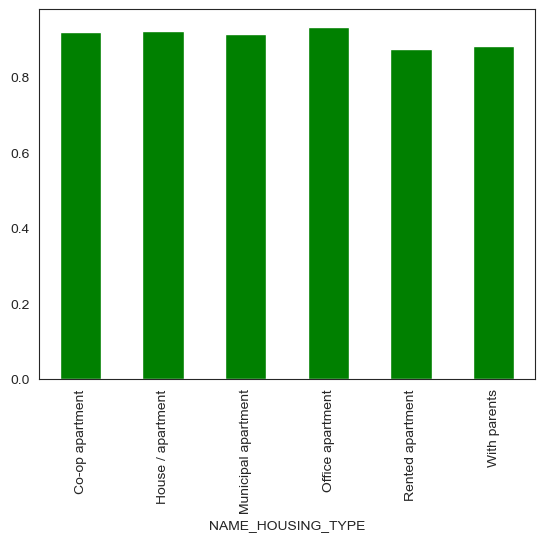

In [108]:
#plot the bar graph of NAME_HOUSING_TYPE status with average value of DEFAULT_FLAG

appl_data.groupby(by = ["NAME_HOUSING_TYPE"])["DEFAULT_FLAG"].mean().plot.bar(color = "green")
plt.show()

#clients in Office apartment category of office apartment has highest average of non-default of credit.

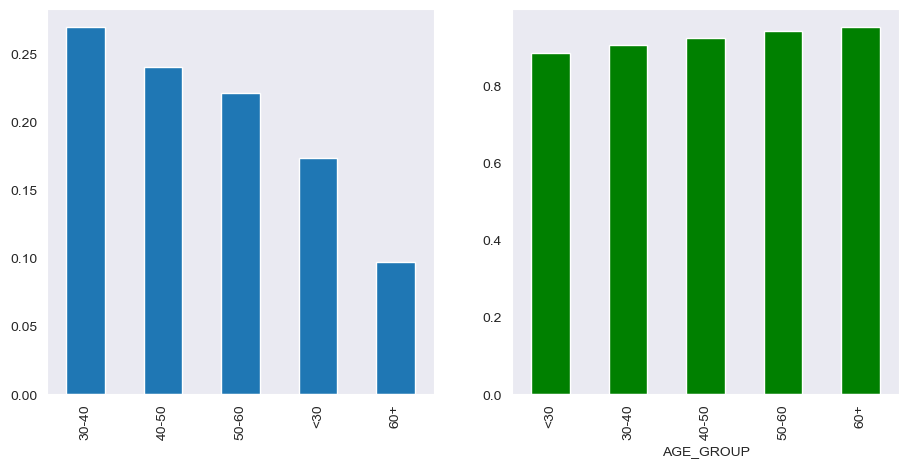

In [109]:
#plotting a subplot for the percentage of each age group and average values of DEFAULT_FLAG in each buckets.

sns.set_style("dark")
plt.figure(figsize = [11,5])
plt.subplot(1,2,1)
appl_data["AGE_GROUP"].value_counts(normalize = True).plot.bar()

plt.subplot(1,2,2)
appl_data.groupby(by = ["AGE_GROUP"])["DEFAULT_FLAG"].mean().plot.bar(color = "green")
plt.show()

#### Insights from the graph
##### Clients among the age group 60+ age accounts as low as 9.67%, however the mean of non-default for 60+ aged population is marginally higher than others.

In [110]:
#grouping by the education to find the mean of the AMT_INCOME_TOTAL.

appl_data.groupby(by = ["NAME_EDUCATION_TYPE"])["AMT_INCOME_TOTAL"].mean()

#average income of Academic degree category of NAME_EDUCATION_TYPE has the highest among the others with 2,05,550

NAME_EDUCATION_TYPE
Academic degree                  205550.335570
Higher education                 187999.734460
Incomplete higher                171831.150344
Lower secondary                  127534.333509
Secondary / secondary special    150715.076310
Name: AMT_INCOME_TOTAL, dtype: float64

In [111]:
#grouping by the income type to find the mean of the AMT_INCOME_TOTAL.

appl_data.groupby(by = ["NAME_INCOME_TYPE"])["AMT_INCOME_TOTAL"].mean()

#average income of Businessman category of NAME_INCOME_TYPE has the highest among the others with 2,02,500

NAME_INCOME_TYPE
Businessman             202500.000000
Commercial associate    185035.796628
Maternity leave         140400.000000
Pensioner               133168.494683
State servant           170763.298570
Student                 147441.176471
Unemployed              110536.363636
Working                 156913.758133
Name: AMT_INCOME_TOTAL, dtype: float64

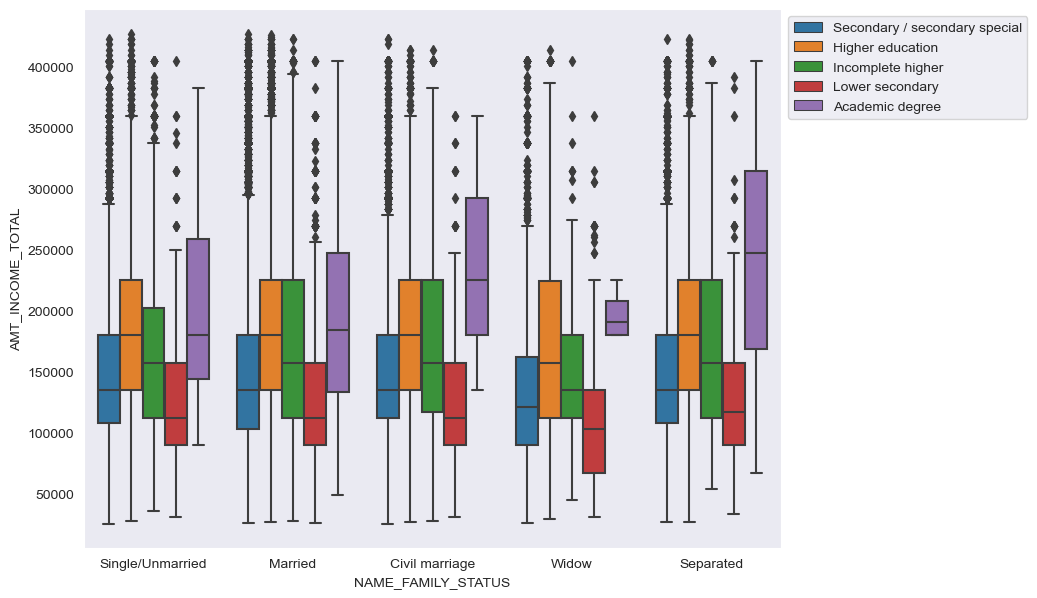

In [112]:
#plotting a box plot for income and education type

plt.figure(figsize = [9,7])
sns.boxplot(data = appl_data, x = "NAME_FAMILY_STATUS", y = "AMT_INCOME_TOTAL", hue = "NAME_EDUCATION_TYPE")
plt.legend(bbox_to_anchor = (1,1))
plt.show()

#IQR or the box of total income for clients belonging to higher education is alomost equal.
#clients with lower secondary education has the lowest total income among the others

In [113]:
#NAME_EDUCATION_TYPE vs NAME_FAMILY_STATUS vs DEFAULT_FLAG

appl_data.pivot_table(index = "NAME_EDUCATION_TYPE", columns = "NAME_FAMILY_STATUS", values = "DEFAULT_FLAG", aggfunc = "mean")

NAME_FAMILY_STATUS,Civil marriage,Married,Separated,Single/Unmarried,Widow
NAME_EDUCATION_TYPE,,,,,
Academic degree,1.000000,0.979167,1.000000,0.962963,1.000000
Higher education,0.932486,0.949544,0.943680,0.937188,0.950313
Incomplete higher,0.907080,0.920647,0.910615,0.905633,0.936047
Lower secondary,0.863747,0.896836,0.861751,0.866319,0.931873
Secondary / secondary special,0.891482,0.915878,0.910120,0.886653,0.940294


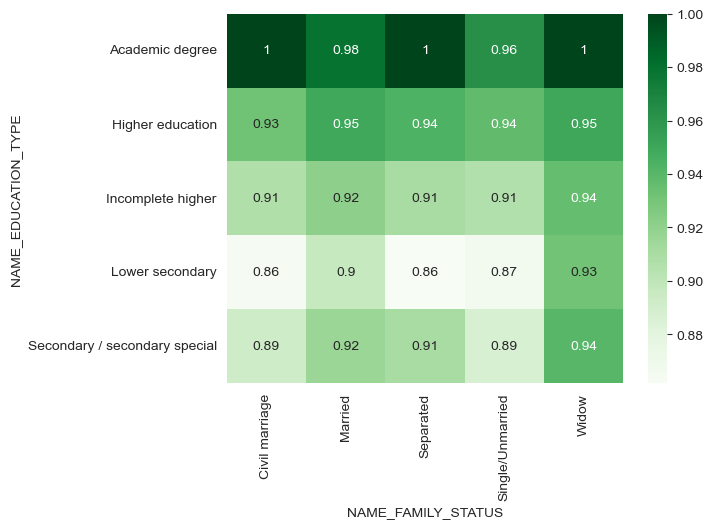

In [114]:
#plotting a heat map for visualising the #NAME_EDUCATION_TYPE vs NAME_FAMILY_STATUS vs DEFAULT_FLAG

sns.heatmap(appl_data.pivot_table(index = "NAME_EDUCATION_TYPE", columns = "NAME_FAMILY_STATUS", values = "DEFAULT_FLAG", aggfunc = "mean"), annot = True, cmap = "Greens")
plt.show()

#clients with academic degree have the highest average of non-default count irrespective of different family status.
#clients with combination of Lower secondary education and civil marriage or separated or single/unmarried has lowest mean of non-default

In [115]:
#creating the heat map of NAME_INCOME_TYPE vs NAME_FAMILY_STATUS vs DEFAULT_FLAG.

inc_fam_def = appl_data.pivot_table(index = "NAME_FAMILY_STATUS", columns = "NAME_INCOME_TYPE", values = "DEFAULT_FLAG",aggfunc = "mean")
inc_fam_def

NAME_INCOME_TYPE,Businessman,Commercial associate,Maternity leave,Pensioner,State servant,Student,Unemployed,Working
NAME_FAMILY_STATUS,,,,,,,,
Civil marriage,NaN,0.909825,NaN,0.936146,0.923077,1.0,1.000000,0.885178
Married,1.0,0.929793,0.6,0.949010,0.945568,1.0,0.400000,0.910394
Separated,NaN,0.925798,NaN,0.939614,0.945701,NaN,1.000000,0.902799
Single/Unmarried,NaN,0.908233,NaN,0.944892,0.931085,1.0,0.800000,0.883384
Widow,NaN,0.943990,NaN,0.942897,0.949054,NaN,0.666667,0.936391


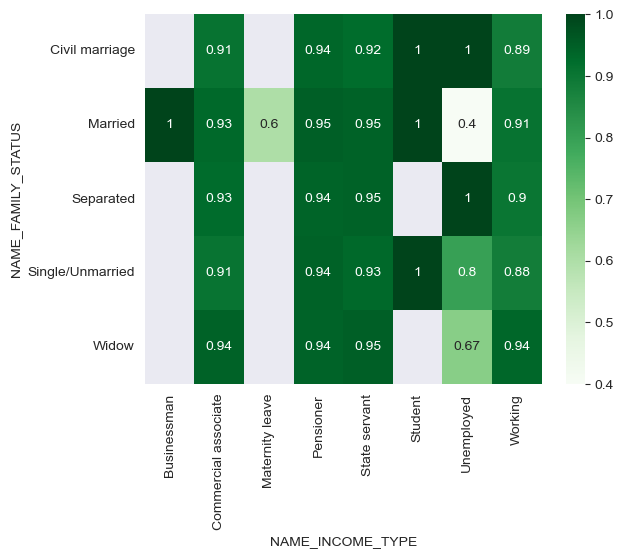

In [116]:
sns.heatmap(inc_fam_def, annot = True, cmap = "Greens")
plt.show()

In [117]:
#creating a pivot table for "AGE_GROUP", "INCOME_GROUP" and "DEFAULT_FLAG" with aggregation of mean

age_inc_def = appl_data.pivot_table(index = "AGE_GROUP", columns = "INCOME_GROUP", values = "DEFAULT_FLAG",aggfunc = "mean")
age_inc_def

INCOME_GROUP,25K-75K,75K-1.25L,1.25L-1.75L,1.75L-2.25L,2.25L-2.75L,2.75L-3.25L,3.25L-3.75L,>3.75L
AGE_GROUP,,,,,,,,
<30,0.863593,0.873704,0.883018,0.894174,0.915028,0.926876,0.917045,0.918478
30-40,0.896522,0.899042,0.897925,0.911838,0.920887,0.923215,0.944419,0.937049
40-50,0.919898,0.918908,0.922475,0.923839,0.934771,0.936302,0.944500,0.922432
50-60,0.944344,0.939636,0.941213,0.936782,0.938908,0.949525,0.946360,0.954829
60+,0.952725,0.948274,0.950643,0.950598,0.956560,0.964942,0.949640,0.958904


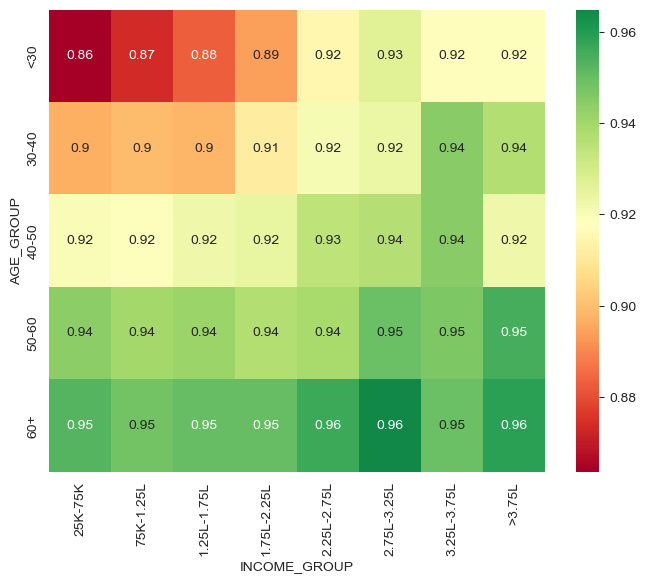

In [118]:
#heatmap for "AGE_GROUP", "INCOME_GROUP" and "DEFAULT_FLAG"

plt.figure(figsize = [8,6])
sns.heatmap(age_inc_def, annot = True, cmap = "RdYlGn", center = 0.918)        # 1 in default_flag accounts for 91.8%, hence center value is set as 0.918
plt.show()

#### Insights from the map
##### 1. Clients of age group 60+ and belonging to income group 2.75L to 3.25L has the highest average of non-default.
##### 2. Similarly, clients falling under age group of <30 and belonging to income group of 25,000 to 2.25L has lowest average of non-default.

In [119]:
#creating a pivot table for "CREDIT_RANGE", "INCOME_GROUP" and "DEFAULT_FLAG" with aggregation of mean

cred_inc_def = appl_data.pivot_table(index = "CREDIT_RANGE", columns = "INCOME_GROUP", values = "DEFAULT_FLAG",aggfunc = "mean")
cred_inc_def

INCOME_GROUP,25K-75K,75K-1.25L,1.25L-1.75L,1.75L-2.25L,2.25L-2.75L,2.75L-3.25L,3.25L-3.75L,>3.75L
CREDIT_RANGE,,,,,,,,
<1L,0.949495,0.949004,0.940179,0.912821,0.923077,0.939394,1.000000,0.600000
1L-2L,0.937490,0.922605,0.926591,0.931279,0.945568,0.934363,0.970370,0.900000
2L-3L,0.922901,0.917501,0.922081,0.922827,0.928137,0.939286,0.933481,0.921788
3L-4L,0.892857,0.895684,0.898402,0.909072,0.914563,0.927481,0.932806,0.877778
4L-5L,0.895184,0.892770,0.897147,0.905704,0.910485,0.934183,0.930909,0.926829
5L-6L,0.909284,0.899074,0.890650,0.895036,0.901382,0.911232,0.920065,0.886463
6L-7L,0.920332,0.912117,0.911204,0.906823,0.915772,0.934138,0.936475,0.911628
7L-8L,0.930147,0.925337,0.926517,0.916079,0.930323,0.923409,0.930464,0.930147
8L-9L,0.911168,0.923953,0.926500,0.929361,0.924661,0.940163,0.942424,0.952862


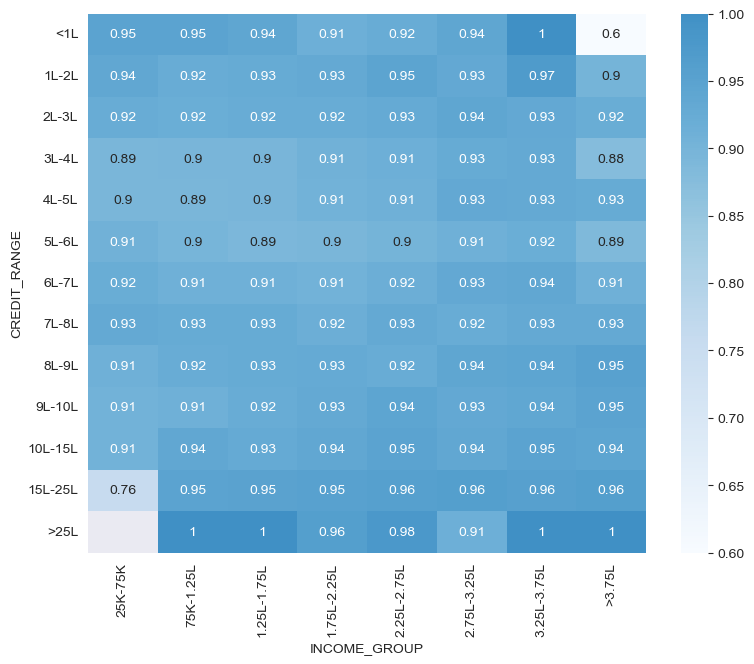

In [120]:
#heatmap for "CREDIT_RANGE", "INCOME_GROUP" and "DEFAULT_FLAG"

plt.figure(figsize = [9,7])
sns.heatmap(cred_inc_def, annot = True, cmap = "Blues", center = 0.918)
plt.show()

#### Insights from heatmap for "CREDIT_RANGE", "INCOME_GROUP" and "DEFAULT_FLAG"
##### 1. Clients belonging to income group between 25,000 to 75,000 and credit loan amount range of 15,00,000 to 25,00,000 has lowest average of non-default.
##### 2. Similarly, among the income group greater than 3,75,000 and credit loan amount range of less than 1,00,000 has lowest mean of non-default.

In [242]:
#Top 10 correlation for the clients with payment difficulties and all other cases

#finding the correlation for the targ_0
targ_0_cor = targ_0.loc[:,"CNT_CHILDREN":].corr()
targ_0_cor

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_IN_YEARS
CNT_CHILDREN,1.000000,0.028347,0.002050,0.019561,-0.001806,-0.025998,-0.246570,0.187980,-0.028046,0.001096,0.247484,0.056429,0.000255,-0.030674,0.022696,0.876843,0.024794,0.023726,-0.005043,-0.012895,0.011082,0.017487,0.021367,0.073981,0.072526,-0.016822,-0.037347,0.015376,-0.002461,0.015018,-0.002039,-0.007941,0.000162,0.001484,-0.000818,-0.007856,-0.003858,-0.031061,-0.341090
AMT_INCOME_TOTAL,0.028347,1.000000,0.393647,0.465014,0.396715,0.169315,-0.180501,0.074276,0.031820,0.000900,0.179988,-0.047596,-0.008175,-0.007378,0.092266,0.036459,-0.207061,-0.225403,0.088148,0.077394,0.159995,0.148813,0.017839,0.036591,0.037870,0.159670,-0.076780,-0.021271,-0.027798,-0.021144,-0.028446,-0.062278,0.003845,0.007244,0.012106,0.072543,0.029399,0.078407,-0.085981
AMT_CREDIT,0.002050,0.393647,1.000000,0.774001,0.986656,0.084628,-0.068868,0.008886,-0.002610,0.001504,0.067643,-0.017133,0.024904,0.023713,0.009551,0.065437,-0.089360,-0.097848,0.049358,0.020085,0.045791,0.047121,-0.025119,-0.013255,0.004961,0.121175,0.035687,0.003967,-0.017171,0.003997,-0.019911,-0.072624,-0.002022,0.005100,0.001651,0.052160,0.022904,-0.024544,0.048897
AMT_ANNUITY,0.019561,0.465014,0.774001,1.000000,0.777164,0.102242,-0.105423,0.035133,0.014677,0.000107,0.104705,-0.022655,0.024802,0.008546,0.062895,0.077608,-0.116906,-0.129659,0.048873,0.036792,0.073405,0.069107,-0.005231,0.005900,0.014658,0.117778,0.026941,-0.006899,-0.019135,-0.006679,-0.020490,-0.065666,0.003883,0.001859,0.013132,0.033568,0.012759,-0.001759,-0.012710
AMT_GOODS_PRICE,-0.001806,0.396715,0.986656,0.777164,1.000000,0.087603,-0.067160,0.011099,-0.004638,0.001470,0.065912,0.005198,0.022267,0.039478,0.009549,0.063680,-0.090133,-0.097870,0.058598,0.021935,0.046601,0.046989,-0.025128,-0.014309,0.003809,0.127747,0.038194,0.004457,-0.018239,0.004450,-0.020797,-0.075069,-0.001391,0.005444,0.002001,0.053835,0.023364,-0.026414,0.046349
REGION_POPULATION_RELATIVE,-0.025998,0.169315,0.084628,0.102242,0.087603,1.000000,-0.003591,-0.054145,-0.002576,0.001415,0.003753,-0.012673,-0.008105,0.086896,0.033942,-0.024690,-0.526086,-0.524776,0.165275,0.001820,0.052497,0.075725,-0.046898,-0.038197,-0.010687,0.191416,-0.009343,-0.007043,0.009596,-0.006508,0.005483,-0.043383,-0.001897,0.001476,-0.003511,0.069474,-0.001658,0.000370,0.027370
DAYS_EMPLOYED,-0.246570,-0.180501,-0.068868,-0.105423,-0.067160,-0.003591,1.000000,-0.210359,-0.277189,0.000885,-0.999770,-0.237812,0.012330,0.015085,-0.062885,-0.239591,0.034925,0.036871,-0.095151,-0.035393,-0.107091,-0.095635,-0.090614,-0.257043,-0.221281,-0.028189,0.097291,0.006033,0.018875,0.006213,0.015916,0.026862,-0.004362,-0.000866,0.001798,-0.032768,0.013050,0.042852,0.620840
DAYS_REGISTRATION,0.187980,0.074276,0.008886,0.035133,0.011099,-0.054145,-0.210359,1.000000,0.101087,-0.000137,0.212479,0.058886,-0.003490,-0.074875,0.034789,0.176953,0.078547,0.072217,-0.008040,0.028605,0.036215,0.026598,0.065004,0.099898,0.072849,-0.054111,-0.093112,0.009230,0.001997,0.009169,0.003577,0.052922,-0.003033,0.000178,-0.001074,-0.011382,-0.000122,-0.022410,-0.333971
DAYS_ID_PUBLISH,-0.028046,0.031820,-0.002610,0.014677,-0.004638,-0.002576,-0.277189,0.101087,1.000000,-0.002453,0.278384,0.047664,-0.003522,-0.037173,0.02

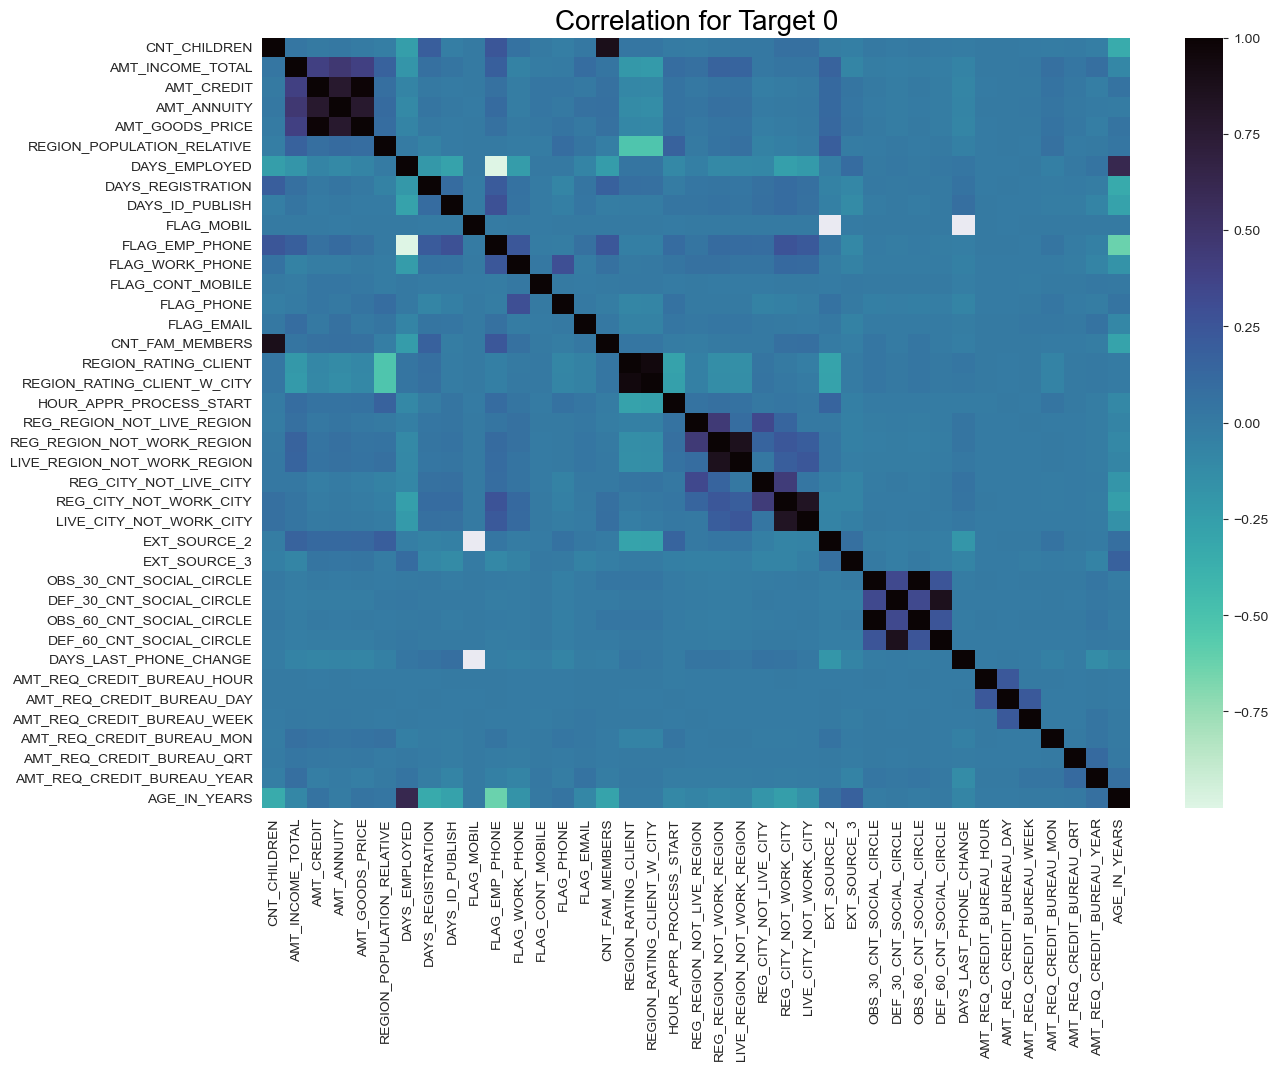

In [252]:
#plotting a heatmap for correlation for targ_0

plt.figure(figsize = [14,10])
sns.heatmap(targ_0_cor, cmap = "mako_r")
plt.title("Correlation for Target 0", fontdict = {"fontsize" : 20, "color" : "black"})
plt.show()

#### Insights from the correlation for Target 0
##### 1. Clients belonging to age group more than 60 has negative correlation. Hence, increase in age leads to decrease in total income.
##### 2. Credit amount is inversely proportional to the days employed, which says people who have been employed for long time has requested low credit amount
##### 3. Clients with more number of children live in less populated region. In other words, clients with less number of children live in densely populated region.
##### 4. Increase in the days of employment for clients leads to decrease in count of children.

In [269]:
#extracting the top 10 correlation from the non-default clients

targ_10_corr = targ_0_cor.unstack().sort_values(ascending = False)
targ_10_corr = targ_10_corr[  targ_10_corr !=  1.0 ]
print(targ_10_corr.head(20)[::2])

OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998507
AMT_CREDIT                   AMT_GOODS_PRICE                0.986656
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.949839
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.876843
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.862205
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.859768
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.830274
AMT_ANNUITY                  AMT_GOODS_PRICE                0.777164
AMT_CREDIT                   AMT_ANNUITY                    0.774001
AGE_IN_YEARS                 DAYS_EMPLOYED                  0.620840
dtype: float64


In [260]:
#finding the correlation for clients with payment difficulties

targ_1_cor = targ_1.loc[:,"CNT_CHILDREN":].corr()
targ_1_cor

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_IN_YEARS
CNT_CHILDREN,1.000000,-0.008211,-0.002036,0.030231,-0.008432,-0.031986,-0.193899,0.149918,-0.030048,NaN,0.194439,0.051172,0.003725,-0.023363,0.014007,0.883697,0.043323,0.045959,-0.025982,-0.024118,-0.020494,-0.011421,-0.000431,0.046396,0.052929,-0.013802,-0.024787,0.027764,0.001646,0.027085,-0.004485,0.009791,0.000748,-0.012642,-0.006979,-0.011159,-0.012197,-0.019439,-0.262743
AMT_INCOME_TOTAL,-0.008211,1.000000,0.341125,0.419750,0.340907,0.109242,-0.122188,0.037674,-0.004660,NaN,0.121705,-0.084893,-0.001639,-0.016831,0.093394,-0.000262,-0.160951,-0.176843,0.078430,0.079936,0.161614,0.148756,0.008624,0.023614,0.027407,0.135594,-0.082921,-0.001593,-0.021374,-0.001035,-0.023149,-0.084590,0.008712,0.002389,0.015698,0.076615,0.033598,0.100514,-0.006735
AMT_CREDIT,-0.002036,0.341125,1.000000,0.750440,0.982311,0.066103,0.001605,-0.027302,-0.054452,NaN,-0.003258,-0.057733,0.031951,0.006582,0.003396,0.052013,-0.052664,-0.065131,0.027914,0.011016,0.027713,0.030173,-0.033053,-0.036938,-0.016300,0.116500,0.057492,0.022628,-0.023924,0.023113,-0.029040,-0.110691,-0.001990,0.005914,0.009591,0.056695,-0.006250,-0.006995,0.135415
AMT_ANNUITY,0.030231,0.419750,0.750440,1.000000,0.749887,0.066191,-0.081712,0.033282,-0.017340,NaN,0.080941,-0.047408,0.035878,-0.016306,0.069923,0.075560,-0.065271,-0.081381,0.028287,0.030409,0.063270,0.060926,-0.004440,0.004591,0.011321,0.110419,0.037501,0.007760,-0.020503,0.008809,-0.025698,-0.078822,0.015235,0.001447,0.028850,0.049648,-0.007031,-0.005974,0.011999
AMT_GOODS_PRICE,-0.008432,0.340907,0.982311,0.749887,1.000000,0.073672,0.006408,-0.027452,-0.058540,NaN,-0.008114,-0.031346,0.029035,0.026254,0.007037,0.048244,-0.060008,-0.071170,0.040519,0.013898,0.030968,0.032473,-0.034147,-0.038426,-0.016738,0.127185,0.058504,0.023585,-0.019511,0.024155,-0.024165,-0.118232,-0.000703,0.006926,0.010010,0.059651,-0.004971,-0.009063,0.135830
REGION_POPULATION_RELATIVE,-0.031986,0.109242,0.066103,0.066191,0.073672,1.000000,0.016686,-0.056042,-0.015332,NaN,-0.016996,-0.016297,-0.003231,0.069054,0.026232,-0.030583,-0.436950,-0.440755,0.140527,-0.023704,0.018332,0.041643,-0.060001,-0.051474,-0.019692,0.165328,-0.007968,0.007707,0.027122,0.008269,0.019321,-0.054396,0.000467,-0.004115,0.000907,0.065139,-0.005380,0.005022,0.048305
DAYS_EMPLOYED,-0.193899,-0.122188,0.001605,-0.081712,0.006408,0.016686,1.000000,-0.189772,-0.227514,NaN,-0.999701,-0.208573,0.009551,0.014576,-0.039909,-0.187715,0.001247,0.000584,-0.059366,-0.032580,-0.088619,-0.076920,-0.085726,-0.243609,-0.197520,-0.000162,0.080668,-0.009840,0.002908,-0.010025,0.005261,0.003543,-0.006529,0.019914,0.011200,-0.023702,0.012049,0.027328,0.577760
DAYS_REGISTRATION,0.149918,0.037674,-0.027302,0.033282,-0.027452,-0.056042,-0.189772,1.000000,0.096740,NaN,0.191568,0.050163,0.003839,-0.063065,0.021723,0.147044,0.105572,0.102123,-0.033592,0.020771,0.021030,0.015393,0.049241,0.088548,0.062268,-0.070892,-0.071141,0.015357,0.011708,0.015785,0.011105,0.069639,-0.005193,-0.008952,0.002338,0.003513,-0.014419,-0.015050,-0.289767
DAYS_ID_PUBLISH,-0.030048,-0.004660,-0.054452,-0.017340,-0.058540,-0.015332,-0.227514,0.096740,1.000000,NaN,0.228948,0.024342,0.008336,-0.039007,0.028527,-0.029394,0.001759,-0.001378,0

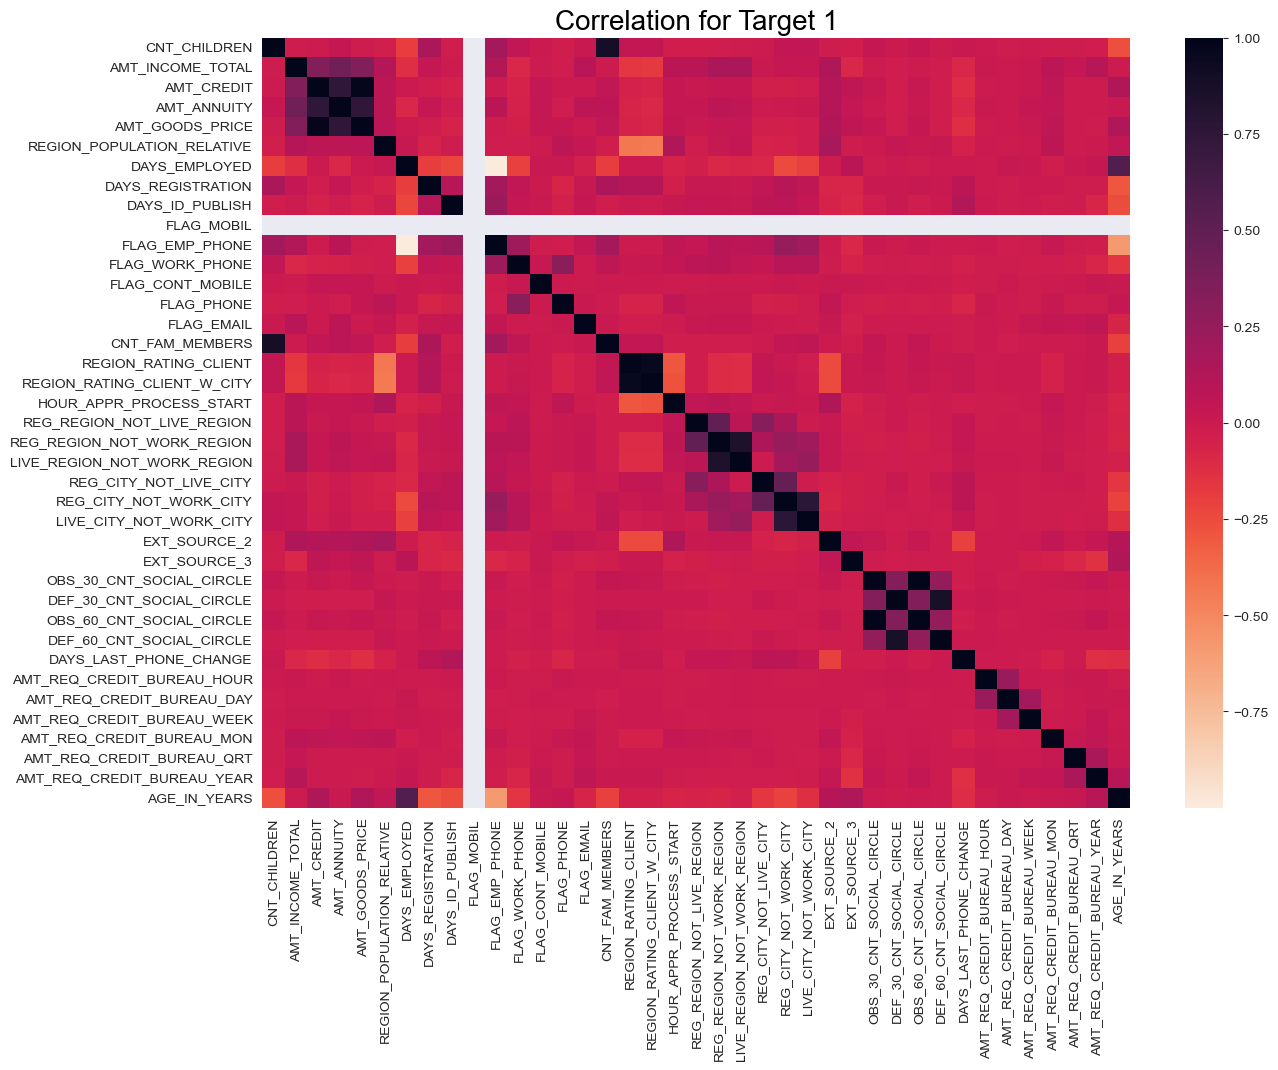

In [263]:
#plotting a heatmap for correlation for targ_0

plt.figure(figsize = [14,10])
sns.heatmap(targ_1_cor, cmap = "rocket_r")
plt.title("Correlation for Target 1", fontdict = {"fontsize" : 20, "color" : "black"})
plt.show()

##### 1. Increase in the number of children leads to the decrease in total income
##### 2. Clients with less number of children have requested higher loan credit amount

In [268]:
#extracting the top 10 correlation from the clients with payment difficulties

targ_10_corr_1 = targ_1_cor.unstack().sort_values(ascending = False)
targ_10_corr_1 = targ_10_corr_1[  targ_10_corr_1 !=  1.0 ]
print(targ_10_corr_1.head(20)[::2])

OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998260
AMT_GOODS_PRICE              AMT_CREDIT                     0.982311
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.956759
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.883697
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.868603
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.848309
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.777878
AMT_CREDIT                   AMT_ANNUITY                    0.750440
AMT_ANNUITY                  AMT_GOODS_PRICE                0.749887
AGE_IN_YEARS                 DAYS_EMPLOYED                  0.577760
dtype: float64


### Handling Previous Application dataframe

In [121]:
#Handling inconsistent values in previous application dataframe

prev_appl["NAME_CONTRACT_TYPE"].value_counts()     #346 records has value "XNA" among the contract type, which appears to be invalid

Cash loans         747553
Consumer loans     729151
Revolving loans    193163
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [122]:
#replacing the value "XNA" with mode of the variable "Cash loans"

cont_mode = prev_appl["NAME_CONTRACT_TYPE"].mode()[0]
prev_appl["NAME_CONTRACT_TYPE"] = prev_appl["NAME_CONTRACT_TYPE"].apply(lambda x : x.replace("XNA",cont_mode))

In [123]:
#Handling inconsistent values in NAME_CLIENT_TYPE

prev_appl["NAME_CLIENT_TYPE"].value_counts()

Repeater     1231260
New           301363
Refreshed     135649
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64

In [124]:
#replacing the value "XNA" with mode of the variable "Cash loans"

client_mode = prev_appl["NAME_CLIENT_TYPE"].mode()[0]
prev_appl["NAME_CLIENT_TYPE"] = prev_appl["NAME_CLIENT_TYPE"].apply(lambda x : x.replace("XNA",client_mode))

In [125]:
#handling inconsistent values in NAME_CASH_LOAN_PURPOSE variable

prev_appl["NAME_CASH_LOAN_PURPOSE"].value_counts()    #"XAP" and "XNA" appears to be invalid and consists of 922660 & 677918 records respectively.

XAP                                 922660
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In [126]:
#dropping the records with "XAP" and "XNA"

prev_appl = prev_appl[ ~ (prev_appl["NAME_CASH_LOAN_PURPOSE"].isin(["XAP","XNA"]))  ]

prev_appl["NAME_CASH_LOAN_PURPOSE"].value_counts() 

Repairs                             23765
Other                               15608
Urgent needs                         8412
Buying a used car                    2888
Building a house or an annex         2693
Everyday expenses                    2416
Medicine                             2174
Payments on other loans              1931
Education                            1573
Journey                              1239
Purchase of electronic equipment     1061
Buying a new car                     1012
Wedding / gift / holiday              962
Buying a home                         865
Car repairs                           797
Furniture                             749
Buying a holiday home / land          533
Business development                  426
Gasification / water supply           300
Buying a garage                       136
Hobby                                  55
Money for a third person               25
Refusal to name the goal               15
Name: NAME_CASH_LOAN_PURPOSE, dtyp

In [127]:
#handling inconsistencies in "NAME_PAYMENT_TYPE" variable of prev_appl dataframe

prev_appl["NAME_PAYMENT_TYPE"].value_counts()

Cash through the bank                        63835
XNA                                           5416
Non-cash from your account                     320
Cashless from the account of the employer       64
Name: NAME_PAYMENT_TYPE, dtype: int64

In [128]:
#replacing the "XNA" with mode of the variable "Cash through the bank"

pay_mode = prev_appl["NAME_PAYMENT_TYPE"].mode()[0]

prev_appl["NAME_PAYMENT_TYPE"] = prev_appl["NAME_PAYMENT_TYPE"].apply(lambda x : x.replace("XNA",pay_mode))

### Merging the dataframe: appl_data and prev_appl
##### Merging the two dataframe appl_data and prev_appl on SK_ID_CURR to create a new dataframe "merge_appl"

In [132]:
#merging two dataframes on "SK_ID_CURR" column

merge_appl = appl_data.merge(prev_appl, on = "SK_ID_CURR", how = "inner", suffixes = ("_curr","_prev"))
merge_appl.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_curr,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_curr,AMT_ANNUITY_curr,AMT_GOODS_PRICE_curr,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_curr,HOUR_APPR_PROCESS_START_curr,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_IN_YEARS,AGE_GROUP,INCOME_GROUP,CREDIT_RANGE,DEFAULT_FLAG,SK_ID_PREV,NAME_CONTRACT_TYPE_prev,AMT_ANNUITY_prev,AMT_APPLICATION,AMT_CREDIT_prev,AMT_GOODS_PRICE_prev,WEEKDAY_APPR_PROCESS_START_prev,HOUR_APPR_PROCESS_START_prev,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100034,0,Revolving loans,M,N,Y,0,90000,180000,9000,180000,Unaccompanied,Working,Higher education,Single/Unmarried,With parents,0.030755,-1010,-4799,-3015,1,1,0,1,0,0,1.0,2,2,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.502779,0.510853,0.0,0.0,0.0,0.0,-599.0,0,0,0,0,0,0,28,<30,75K-1.25L,1L-2L,1,1390369,Cash loans,22430,94500,109971,94500,FRIDAY,11,Y,1,Other,Approved,-599,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high
1,100035,0,Cash loans,F,N,Y,0,292500,665892,24592,477000,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-2668,-5266,-3787,1,1,0,1,0,1,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.479987,0.410103,0.0,0.0,0.0,0.0,-1634.0,0,0,0,1,0,5,41,40-50,2.75L-3.25L,6L-7L,1,1344613,Cash loans,33238,1260000,1260000,1260000,WEDNESDAY,14,Y,1,Payments on other loans,Refused,-119,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low
2,100039,0,Cash loans,M,Y,N,1,360000,733315,39069,679500,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,-2060,-3557,-3557,1,1,0,1,0,0,3.0,2,2,THURSDAY,10,0,0,0,1,1,0,Self-employed,0.321745,0.411849,2.0,0.0,2.0,0.0,-697.0,0,0,0,0,1,1,32,30-40,3.25L-3.75L,7L-8L,1,1077565,Cash loans,52513,1350000,1487214,1350000,MONDAY,14,Y,1,Buying a used car,Approved,-695,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low
3,100046,0,Revolving loans,M,Y,Y,0,180000,540000,27000,540000,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,-1761,-8236,-4292,1,1,0,1,0,0,2.0,2,2,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,0.738053,0.605836,1.0,0.0,1.0,0.0,-540.0,0,0,0,1,0,1,44,40-50,1.75L-2.25L,5L-6L,1,1223113,Cash loans,28390,337500,407911,337500,MONDAY,13,Y,1,Repairs,Approved,-539,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low
4,100046,0,Revolving loans,M,Y,Y,0,180000,540000,27000,540000,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,-1761,-8236,-4292,1,1,0,1,0,0,2.0,2,2,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,0.738053,0.605836,1.0,0.0,1.0,0.0,-540.0,0,0,0,1,0,1,44,40-50,1.75L-2.25L,5L-6L,1,1529558,Cash loans,29053,450000,555723,450000,MONDAY,15,Y,1,Repairs,Refused,-44

In [135]:
#printing the shape of merged dataframe merge_appl

merge_appl.shape

(57978, 81)

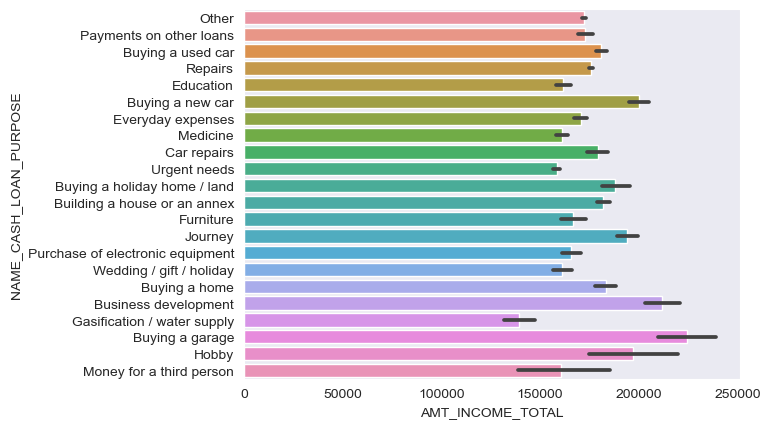

In [142]:
#bar graph for NAME_CASH_LOAN_PURPOSE and AMT_INCOME_TOTAL

sns.barplot(data = merge_appl[~(merge_appl["NAME_CASH_LOAN_PURPOSE"] == "Refusal to name the goal")], y = "NAME_CASH_LOAN_PURPOSE", x = "AMT_INCOME_TOTAL")
plt.show()     #extracting the dataframe without the value "Refusal to name the goal" of NAME_CASH_LOAN_PURPOSE column

#Clients who got credit in previous application and utilised it for buying a garage has the highest average income.

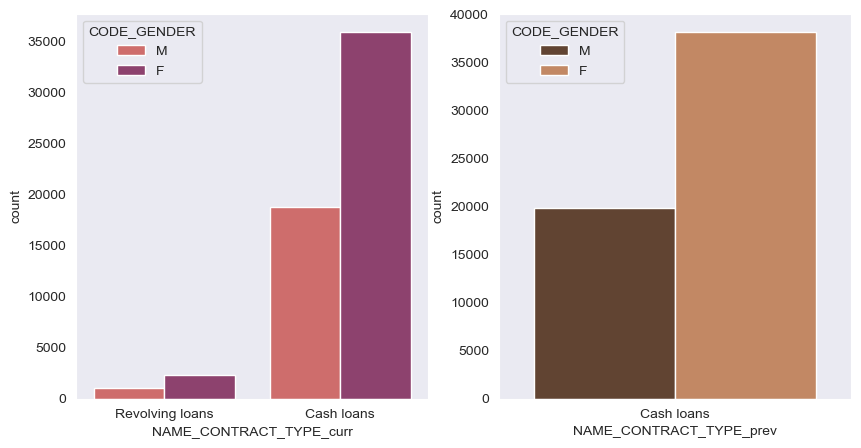

In [153]:
#plotting a count plot for NAME_CONTRACT_TYPE_curr and NAME_CONTRACT_TYPE_prev with a subplot

plt.figure(figsize = [10,5])
plt.subplot(1,2,1)
sns.countplot(data = merge_appl, x = "NAME_CONTRACT_TYPE_curr", hue = "CODE_GENDER", palette = "flare")

plt.subplot(1,2,2)
sns.countplot(data = merge_appl, x = "NAME_CONTRACT_TYPE_prev", hue = "CODE_GENDER", palette = "copper")
plt.show()

#intersecting/common clients in merged dataframe had got only cash loans, previously.

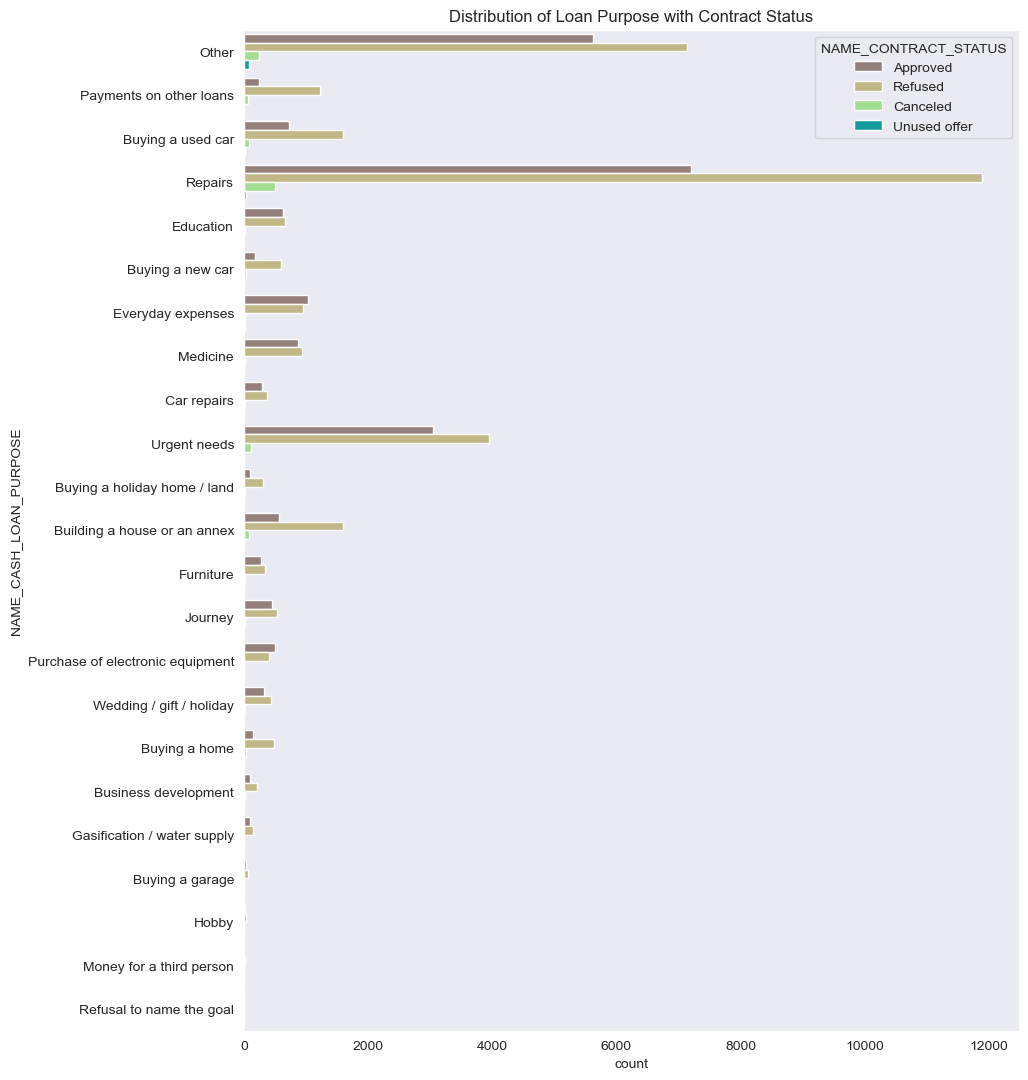

In [175]:
#plotting a countplot for NAME_CASH_LOAN_PURPOSE with hue of NAME_CONTRACT_STATUS

plt.figure(figsize = [10,13])
sns.countplot(data = merge_appl, y = "NAME_CASH_LOAN_PURPOSE", hue = "NAME_CONTRACT_STATUS", palette = "terrain_r")
plt.title("Distribution of Loan Purpose with Contract Status")
plt.show()

#With the application status of "approved" combined with loan purpose of "Repairs" has the highest occurrence among other values.

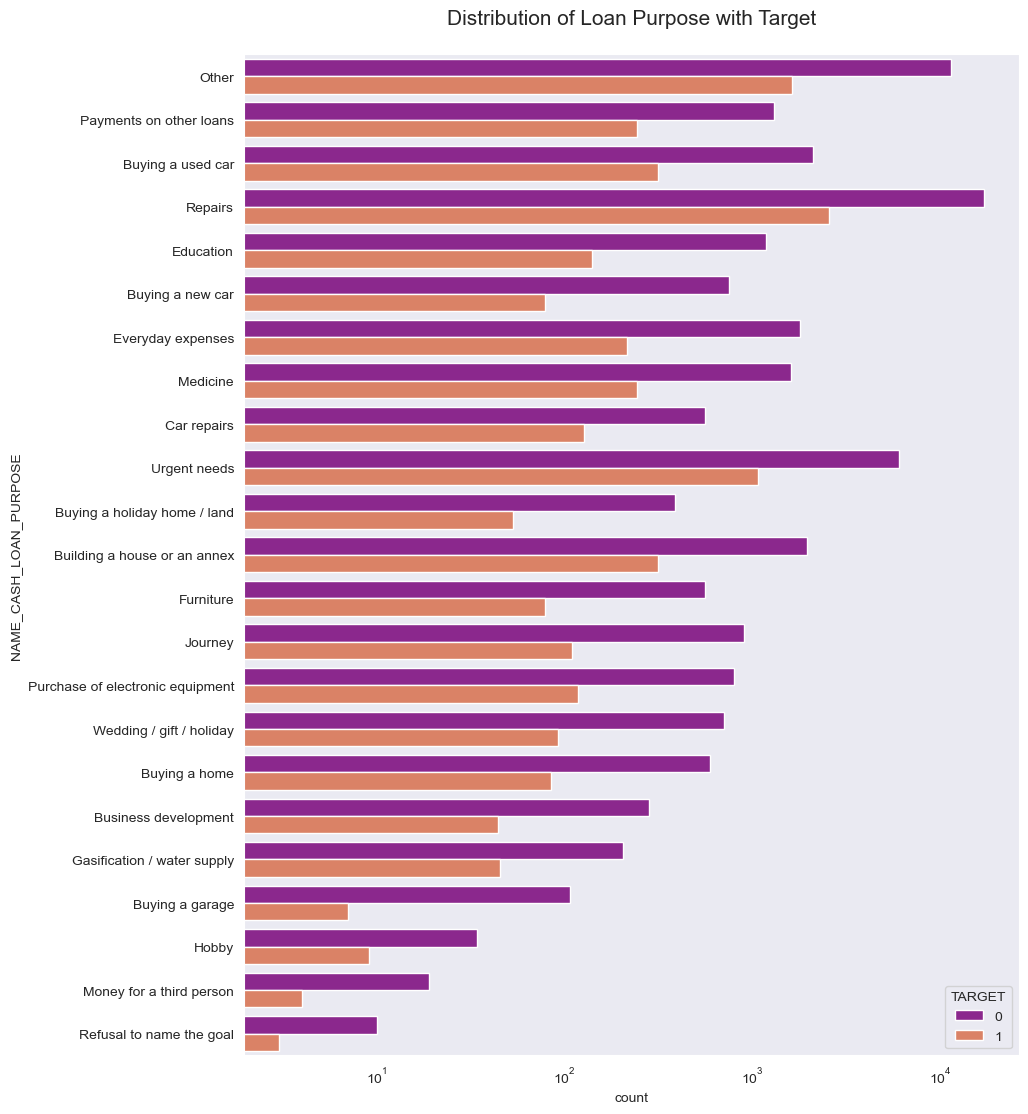

In [196]:
#plotting a count plot for distribution of loan purpose and target with hue

plt.figure(figsize = [10,13])
sns.countplot(data = merge_appl, y = "NAME_CASH_LOAN_PURPOSE", hue = "TARGET", palette = "plasma")
plt.title("Distribution of Loan Purpose with Target\n",fontdict = {"fontsize":15})
plt.xscale("log")
plt.show()

#Clients with loan purpose of "Repairs" has highest count of non_default among others.

In [200]:
#plotting a heatmap for "NAME_CASH_LOAN_PURPOSE", "AGE_GROUP" and "DEFAULT_FLAG"

#creating a pivot table with mean of default_flag for calculation of average of target
purp_age_def = merge_appl.pivot_table(index = "NAME_CASH_LOAN_PURPOSE", columns = "AGE_GROUP", values = "DEFAULT_FLAG", aggfunc = "mean")
purp_age_def

AGE_GROUP,<30,30-40,40-50,50-60,60+
NAME_CASH_LOAN_PURPOSE,,,,,
Building a house or an annex,0.819820,0.862342,0.860987,0.883041,0.886957
Business development,0.775510,0.900000,0.881818,0.830508,0.944444
Buying a garage,0.857143,0.975610,1.000000,0.866667,0.666667
Buying a holiday home / land,0.898990,0.841270,0.850467,0.925532,1.000000
Buying a home,0.874016,0.857143,0.829412,0.932432,1.000000
Buying a new car,0.854251,0.921233,0.963190,0.903846,0.880000
Buying a used car,0.870343,0.863741,0.876768,0.865443,0.923077
Car repairs,0.852273,0.788660,0.818681,0.796610,0.857143
Education,0.879397,0.873563,0.910714,0.894942,0.940299


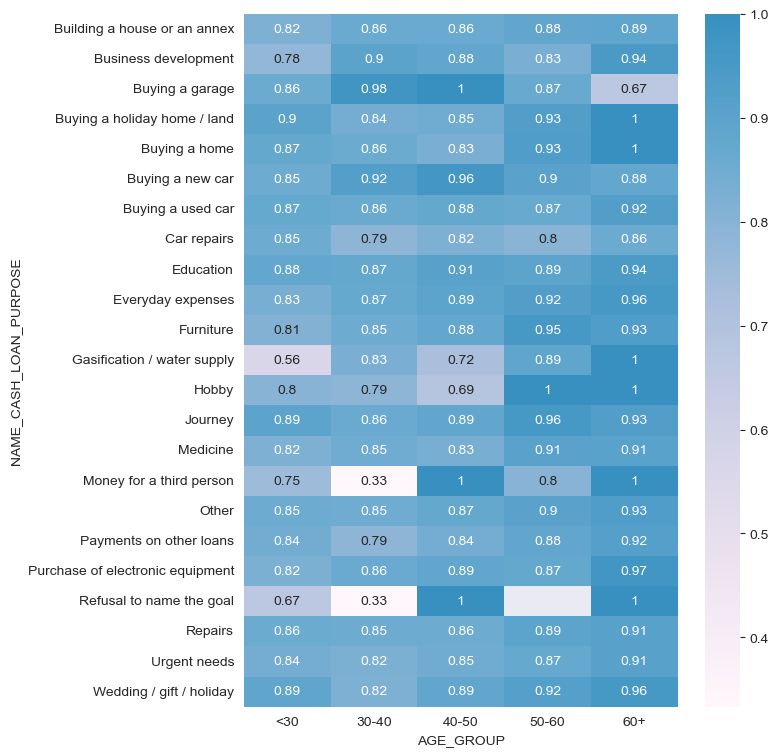

In [226]:
#plotting the heatmap for purp_age_def

plt.figure(figsize = [7,9])
sns.heatmap(purp_age_def, annot = True, cmap = "PuBuGn", center = 0.869)
plt.show()

#### Insights from the heatmap for "NAME_CASH_LOAN_PURPOSE", "AGE_GROUP" and "DEFAULT_FLAG"
##### 1. Clients belonging to age group of 40 - 50 and loan purpose as per the previous application of "Buying a garage" & "Money for third person" has highest average of non-default.
##### 2. Similarly, clients belonging to age group of 60+ with loan purpose of "Gasification/Water Supply", "Hobby", "Buying a home", "Buying a holiday home/land" has highest mean of non-default.
##### 3. Clients belonging to age group of 30 - 40 with loan purpose of "Money to third person" & "Refusal to name the goal" has the lowest mean of non-default.

In [230]:
#plotting a heatmap for "NAME_CASH_LOAN_PURPOSE", "INCOME_GROUP" and "DEFAULT_FLAG"

#creating a pivot table with mean of default_flag for calculation of average of target
purp_inc_def = merge_appl.pivot_table(index = "NAME_CASH_LOAN_PURPOSE", columns = "INCOME_GROUP", values = "DEFAULT_FLAG", aggfunc = "mean")
purp_inc_def

INCOME_GROUP,25K-75K,75K-1.25L,1.25L-1.75L,1.75L-2.25L,2.25L-2.75L,2.75L-3.25L,3.25L-3.75L,>3.75L
NAME_CASH_LOAN_PURPOSE,,,,,,,,
Building a house or an annex,0.804124,0.826667,0.874336,0.877874,0.894472,0.926230,0.908046,0.521739
Business development,1.000000,0.812500,0.903226,0.875000,0.938776,0.576923,0.952381,0.714286
Buying a garage,1.000000,0.571429,1.000000,0.970588,0.954545,0.800000,1.000000,1.000000
Buying a holiday home / land,0.833333,0.796875,0.902655,0.857143,0.933333,1.000000,0.866667,0.909091
Buying a home,0.928571,0.814516,0.896040,0.832536,0.961538,0.978261,1.000000,0.800000
Buying a new car,1.000000,0.902439,0.868000,0.925490,0.919192,0.922078,0.902439,1.000000
Buying a used car,0.750000,0.895879,0.864507,0.874189,0.892019,0.893617,0.854839,0.545455
Car repairs,0.900000,0.828358,0.822581,0.791304,0.821429,0.870968,0.812500,0.727273
Education,0.887640,0.862573,0.891534,0.918841,0.891892,0.948276,0.961538,0.857143


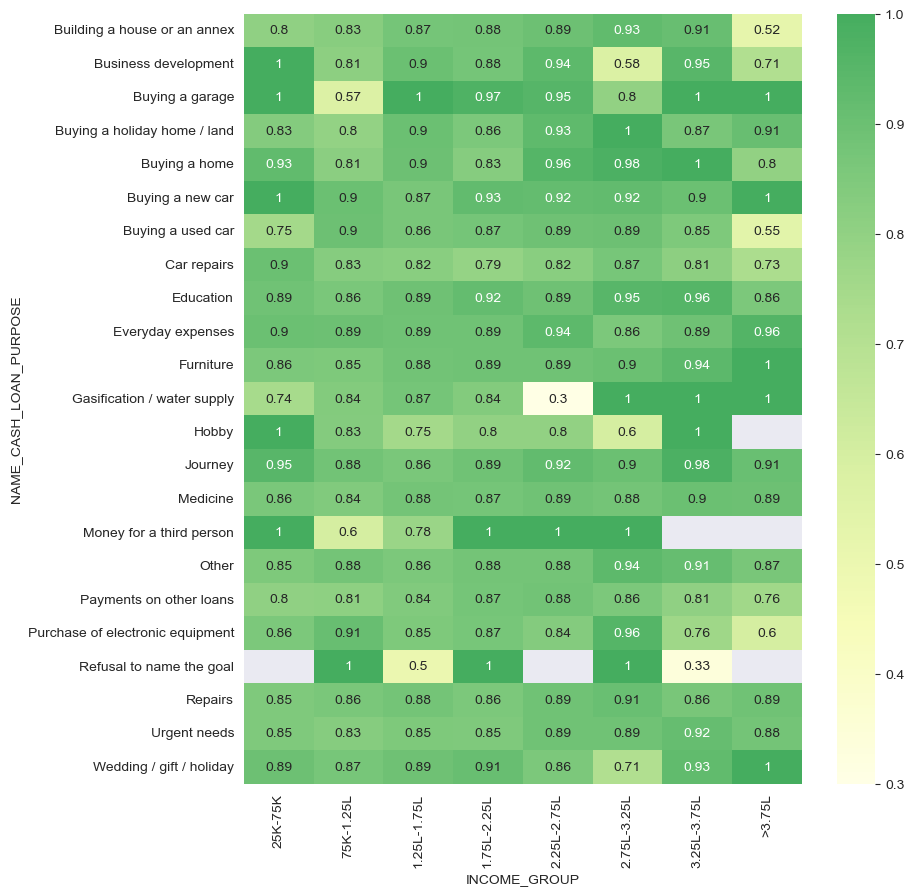

In [235]:
#plotting the heatmap for purp_inc_def

plt.figure(figsize = [9,10])
sns.heatmap(purp_inc_def, annot = True, cmap = "YlGn", center = 0.869)
plt.show()

#### Insights from the heatmap: "NAME_CASH_LOAN_PURPOSE", "INCOME_GROUP" and "DEFAULT_FLAG"
##### 1. It is advisable to issue loans to clients above income of 2,75,000 for the purpose of Gasification/Water Supply
##### 2. Clients with income greater than 3,75,000 and purpose of loan for "wedding/Gift/Holiday" has higher average of non-default.
##### 3. Similarly, it is not advisable to issue loan for purpose of "Building a house or an annex", "Buying a used car" & "Purchase of electronic equipment" for the clients belonging to income group more than 3.75L 

In [236]:
#plotting a heatmap for "NAME_CASH_LOAN_PURPOSE", "NAME_FAMILY_STATUS" and "DEFAULT_FLAG"

#creating a pivot table with mean of default_flag for calculation of average of target
purp_fam_def = merge_appl.pivot_table(index = "NAME_CASH_LOAN_PURPOSE", columns = "NAME_FAMILY_STATUS", values = "DEFAULT_FLAG", aggfunc = "mean")
purp_fam_def

NAME_FAMILY_STATUS,Civil marriage,Married,Separated,Single/Unmarried,Widow
NAME_CASH_LOAN_PURPOSE,,,,,
Building a house or an annex,0.740566,0.874272,0.900000,0.845714,0.910448
Business development,0.815789,0.879630,0.789474,0.837209,1.000000
Buying a garage,1.000000,0.925373,1.000000,0.866667,1.000000
Buying a holiday home / land,0.754386,0.888514,0.833333,0.979167,0.923077
Buying a home,0.921348,0.860045,1.000000,0.847222,0.878788
Buying a new car,0.902174,0.925000,0.911111,0.842767,0.933333
Buying a used car,0.850000,0.882692,0.923664,0.819718,0.827586
Car repairs,0.851064,0.817130,0.666667,0.803419,0.928571
Education,0.910569,0.896028,0.881188,0.874317,0.928571


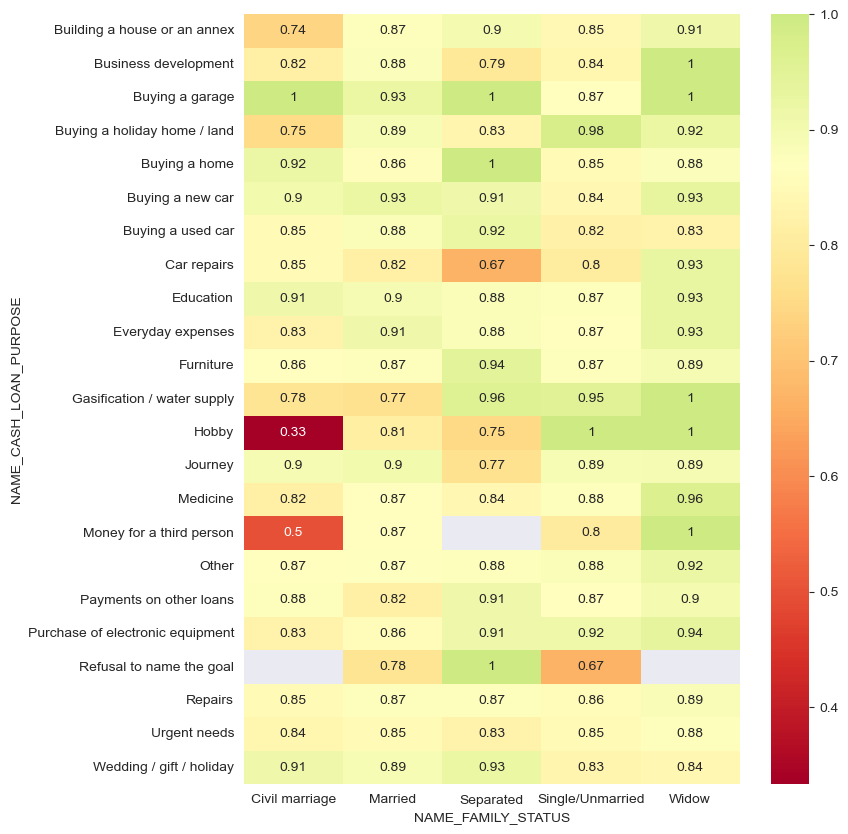

In [238]:
#plotting the heatmap for purp_fam_def

plt.figure(figsize = [8,10])
sns.heatmap(purp_fam_def, annot = True, cmap = "RdYlGn", center = 0.869)
plt.show()

#### Insights from the heatmap: "NAME_CASH_LOAN_PURPOSE", "NAME_FAMILY_STATUS" and "DEFAULT_FLAG"
##### 1. It is advisable to issue loan for clients of "Widow" family status for  the purpose of "Hobby", "Gasification/Water Supply", "Business Development", "Buying a garage"
##### 2. Higher average of non-default could be seen among the clients of "Single/Unmarried" status for the purpose of "Hobby" & "Buying a holiday home/land"
##### 3. Issuing loans to clients with civil marriage for purpose of "Hobby" & "Money to third person" is not advisable.

## Final Insights from the Analysis

##### 1. After cleaning the dataset, imbalance ratio of 11% could be seen in the dataset.
##### 2. Of the total applications in the given data, 90% accounts for cash loan and remaining are revolving loans
##### 3. 1/3rd of the clients own a car and 2/3rd does not own a car.
##### 4. Majority of the clients are confined within the income range of 75,000 to 2,25,000.
##### 5. Positive correlation of 0.39 could be seen between total income and credit amount
##### 6. Most of credit loan amount range lies between 2,00,000 to 3,00,000.
##### 7. Among defaulters, 60+ age group clients accounts a low percentage of 5.86% and 30-40 age group accounts 31.04%.
##### 8. Generally, clients of widowed family status has highest average of non-default.
##### 9. Similarly, it is advisable to issue loans to clients having office apartment and clients holding a academic degree of education type as they have less payment difficulties.
##### 10. Issuance of loan to 60+ age group could be increased as it accounts for only 9.67% however clients of 60+ age group has highest average of non-default.
##### 11. Clients who got credit in previous application and utilized it for buying a garage has the highest average income.
##### 12. Clients with loan purpose of "Repairs" has highest count of non-default among others.

### Based on Education type and Family status:

##### > Clients with academic degree have the highest average of non-default count irrespective of different family status.
##### > Clients with combination of Lower secondary education and civil marriage or separated or single/unmarried has lowest mean of non-default.

### Based on Family Status and Income Type

##### > Clients with combination of Businessman and Married family status have good level of non-default
##### > Clients who are unemployed & married should not be issued loan.

### Based on Income Range Group and Age Group

##### >Generally, clients belonging to age group of 60+ has higher average of non-default. Specifically, clients above 60 and income group of 2,75,000 to 3,25,000 are marginally greater than others.
##### > Similarly, clients belonging to age group less than 30 years are relatively poor performing among than other age group. Further, age group of <30 and income of less than 2,25,000 should not be preferred.

### Based on Credit Range and Income Range Group

##### > Clients belonging to income group between 25,000 to 75,000 and credit loan amount range of 15,00,000 to 25,00,000 has lowest average of non-default.

### Based on Loan Purpose and Age Group

##### > Clients belonging to age group of 40 - 50 and loan purpose as per the previous application of "Buying a garage" & "Money for third person" has highest average of non-default.
##### > Similarly, clients belonging to age group of 60+ with loan purpose of "Gasification/Water Supply", "Hobby", "Buying a home", "Buying a holiday home/land" has highest mean of non-default.
##### > Clients belonging to age group of 30 - 40 with loan purpose of "Money to third person" & "Refusal to name the goal" has the lowest mean of non-default.

### Based on Loan Purpose and Income Range Group

##### > It is advisable to issue loans to clients above income of 2,75,000 for the purpose of Gasification/Water Supply
##### > Clients with income greater than 3,75,000 and purpose of loan for "wedding/Gift/Holiday" has higher average of non-default.
##### > Similarly, it is not advisable to issue loan for purpose of "Building a house or an annex", "Buying a used car" & "Purchase of electronic equipment" for the clients belonging to income group more than 3.75L

### Based on Loan Purpose and Family Status

##### > It is advisable to issue loan for clients of "Widow" family status for the purpose of "Hobby", "Gasification/Water Supply", "Business Development", "Buying a garage"
##### > Issuing loans to clients with civil marriage for purpose of "Hobby" & "Money to third person" is not advisable.